# Imports

## Libraries

In [660]:
# Regular Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
%matplotlib inline


# Models
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# CV
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import KFold

# Model Prep
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import explained_variance_score

# Statistics
from scipy.stats import uniform

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

## Data

In [2]:
# Import Data through Lib
from sklearn.datasets import load_boston

# Loading Data
boston=load_boston()

# Checking description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\akash\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
# Let's convert this data and keep it in df format
df = pd.DataFrame(boston.data,columns=boston.feature_names)

# Add Target
df['Price']=boston.target

# Check - Head
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# EDA

## Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Memory Optimization

In [5]:
def optimizeDT(data):
    
    ### Calculate Total Memory Consumtion Before the Optimization
    beforeOptimizer = {}
    afterOptimizer = {}
    reduction = {}
    
    ### Data Type Bucketing
    int_bucket = data.select_dtypes(include=['int64']).columns.tolist()
    float_bucket = data.select_dtypes(include=['float64']).columns.tolist()
    
    for col in data.columns:
        
        col_dt  =  str(data[col].dtypes)
        col_mem = data[col].memory_usage(deep=True)
        beforeOptimizer[col] = [col_dt, col_mem]
        
        if 'int' in col_dt:
            ### Optimize the Integer Data Type
            if col in int_bucket:
                data[col] = pd.to_numeric(data[col], downcast='integer')
                new_col_dt = str(data[col].dtypes)
                new_col_mem = data[col].memory_usage(deep=True)
                afterOptimizer[col] = [new_col_dt, new_col_mem]
                mem_diff = (beforeOptimizer.get(col)[1] - afterOptimizer.get(col)[1])
                reduction[col] = mem_diff
                
        elif 'float' in col_dt:
            ### Optimize the Floats
            if col in float_bucket:
                data[col] = pd.to_numeric(data[col], downcast='float')
                new_col_dt = str(data[col].dtypes)
                new_col_mem = data[col].memory_usage(deep=True)
                afterOptimizer[col] = [new_col_dt, new_col_mem]
                mem_diff = (beforeOptimizer.get(col)[1] - afterOptimizer.get(col)[1])
                reduction[col] = mem_diff
        
        elif 'object' in col_dt:
            
            ### Optimize the Object
            
            # Calculate the unique value in the column
            uni_val = len(data[col].unique())
            
            # Calculate the Total Value
            tot_val = len(data[col])
            
            # Condition
            if (uni_val / tot_val) < 0.5:
                data[col] = data[col].astype('category')
                new_col_dt = str(data[col].dtypes)
                new_col_mem = data[col].memory_usage(deep=True)
                afterOptimizer[col] = [new_col_dt, new_col_mem]
                mem_diff = (beforeOptimizer.get(col)[1] - afterOptimizer.get(col)[1])
                reduction[col] = mem_diff
            else:
                new_col_dt = str(data[col].dtypes)
                new_col_mem = data[col].memory_usage(deep=True)
                afterOptimizer[col] = [new_col_dt, new_col_mem]
                mem_diff = (beforeOptimizer.get(col)[1] - afterOptimizer.get(col)[1])
                reduction[col] = mem_diff
        else:
            pass
    
    

    ### Build Comparison Report Table
    
    # Set Up Before Table
    bdf = pd.DataFrame(beforeOptimizer).T
    bdf.columns = ['Default DT', 'Default Memory Consumption']
    
    # Set Up After Table
    adf = pd.DataFrame(afterOptimizer).T
    adf.columns = ['Optimized DT', 'Optimized Memory Consumption']
    
    # Set up 
    rdf = pd.DataFrame(reduction, index=[0]).T
    rdf.columns = ['Reduction']
    
    ### Concat DataFrame
    mem_util = pd.concat([bdf, adf, rdf], axis=1)
    
    ### Reduction %
    mem_util['Reduction %'] = mem_util['Reduction'] / mem_util['Default Memory Consumption'] * 100
    
    
    return mem_util

In [6]:
# check
#optimizeDT(df)

In [7]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Summary Set

In [8]:
def extractNumCol(data):
    num_df = data.select_dtypes(include=['number'])
    num_col=list(num_df.columns)
    return num_col

In [9]:
def summarySet(data):
    
    
    """
    
    This Function is replica of Summary Table that present in Pandas.
    It way provide Summary Statistics for Numerical Columns
    
    """
    
    ### Extracting Only Numerical Columns
    numCols = extractNumCol(data)
    
    ### Save DataFrame
    summaryInfo = pd.DataFrame(data=['Count', 'Sum', 'Mean', 'STD', 'Min', '25th Percentile', '50th Percentile', 
                                     '75th Percentile', 'Max'], columns=['STAT'])
    
    for col in numCols:
    
        # Save Results in Dictionary
        result = dict()


        # Count
        count = data[col].count()
        result['Count'] = count

        # sum
        sum_val = data[col].sum()
        result['Sum'] = sum_val

        # Mean
        mean = round(data[col].mean(),2)
        result['Mean'] = mean

        # Min
        min_value = data[col].min()
        result['Min'] = min_value
        
        # Std
        std_value = data[col].std()
        result['STD'] = std_value

        # 25th Percentile
        percentile_25 = data[col].quantile(0.25)
        result['25th Percentile'] = percentile_25

        # 50th Percentile
        percentile_50 = data[col].quantile(0.50)
        result['50th Percentile'] = percentile_50

        # 75th Percentile
        percentile_75 = data[col].quantile(0.75)
        result['75th Percentile'] = percentile_75

        # Max
        max_val = data[col].max()
        result['Max'] = max_val

        # DF
        summaryDF = pd.DataFrame(result.items(), columns=['STAT', col])
        
    
        # Merge
        summaryInfo = summaryInfo.merge(summaryDF, on='STAT', how='left')
        
    return summaryInfo

In [10]:
# Check
summarySet(df)

,STAT,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,Count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
1,Sum,1828.442920,5750.000000,5635.210000,35.000000,280.675700,3180.025000,34698.900000,1920.291600,4832.000000,206568.000000,9338.500000,180477.060000,6402.450000,11401.600000
2,Mean,3.610000,11.360000,11.140000,0.070000,0.550000,6.280000,68.570000,3.800000,9.550000,408.240000,18.460000,356.670000,12.650000,22.530000
3,STD,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
4,Min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
5,25th Percentile,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
6,50th Percentile,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
7,75th Percentile,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
8,Max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Univariate Analysis

In [11]:
def uni_plots(data, col_name):
    fig, ax = plt.subplots(1, 3, figsize=(28, 8), squeeze=False)
    sns.histplot(data, x=col_name,ax=ax[0][0])
    sns.kdeplot(data[col_name], shade=True, ax=ax[0][1])
    sns.ecdfplot(data, x=col_name, ax=ax[0][2]);

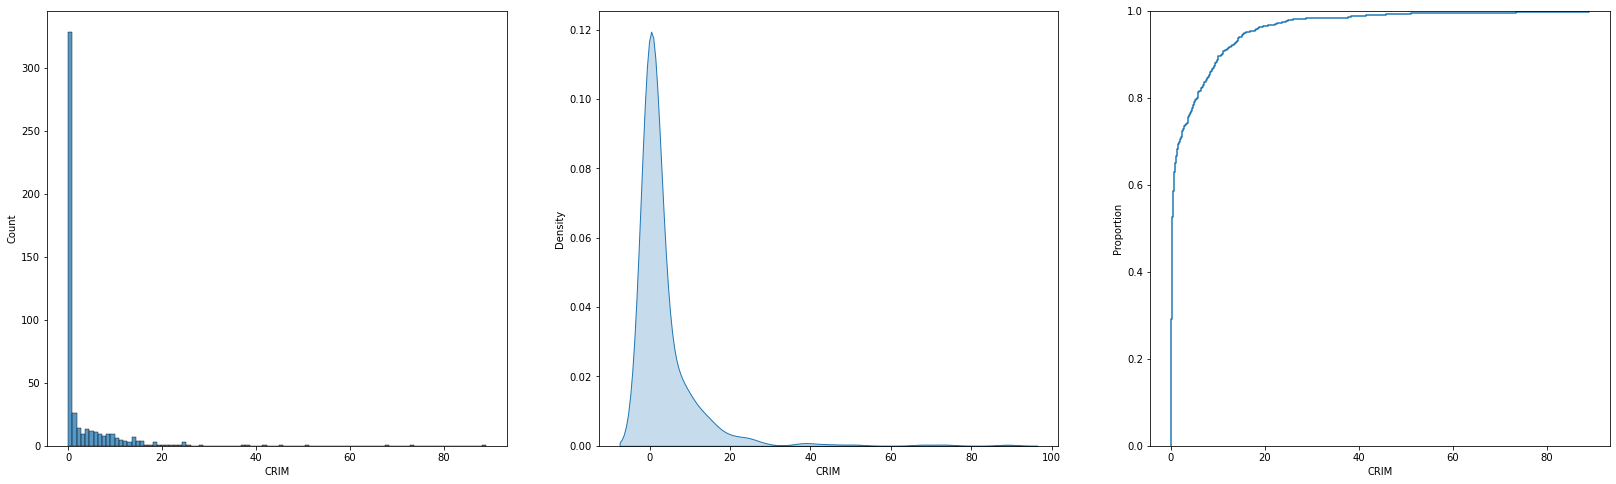

In [12]:
# check
uni_plots(df, 'CRIM')

In [13]:
def univariate_plots(data):
    
    
    """
    
    Univariate Analysis -
    This function prints the univariate plots of all numeric columns
    
        
    """
    
    ### Extract NumCols
    numCols = extractNumCol(data)
    
    for nc in numCols:
        fig, ax = plt.subplots(1, 3, figsize=(28, 8), squeeze=False)
        sns.histplot(data, x=nc,ax=ax[0][0])
        sns.kdeplot(data[nc], shade=True, ax=ax[0][1])
        sns.ecdfplot(data, x=nc, ax=ax[0][2]);

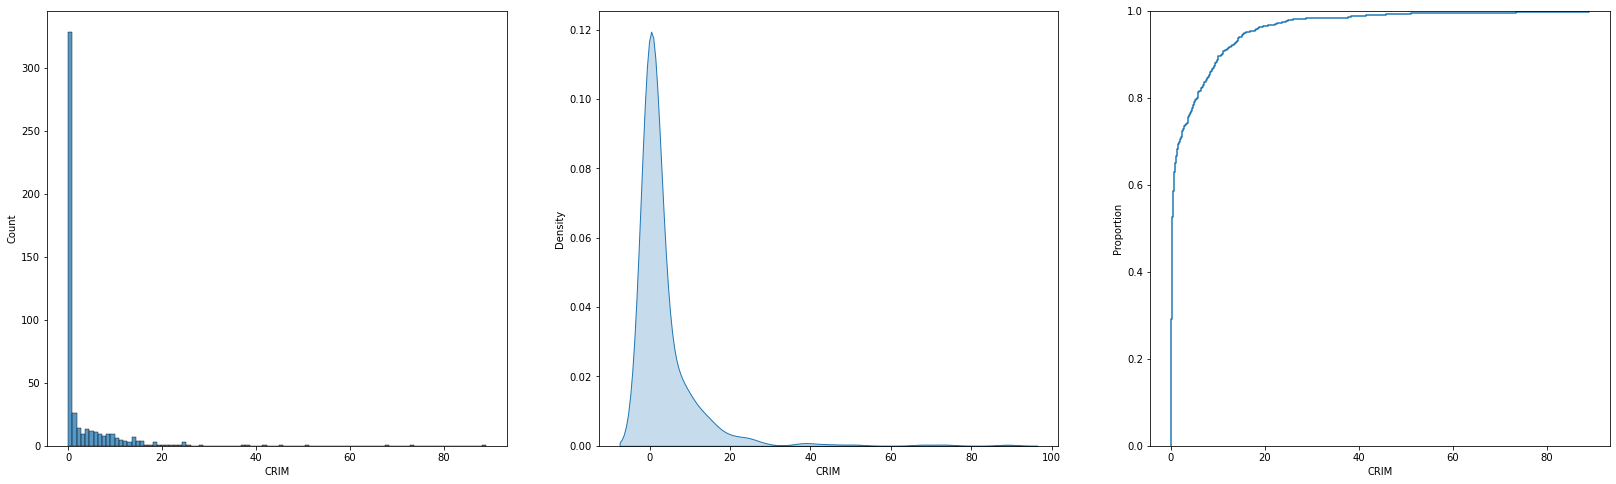

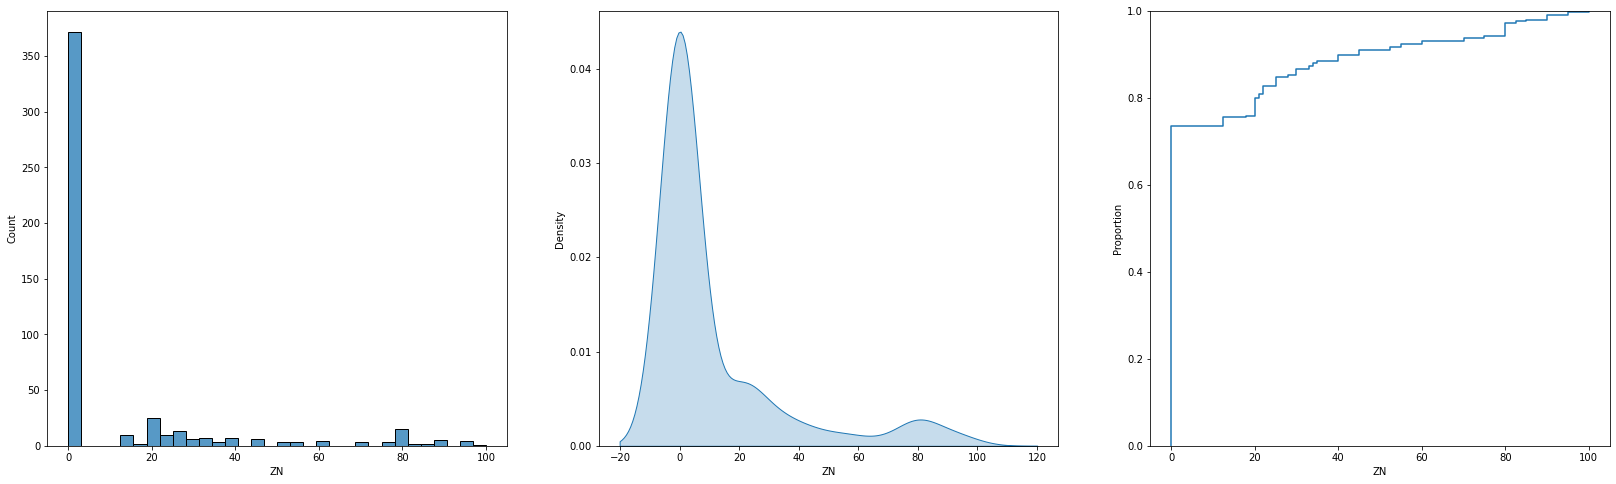

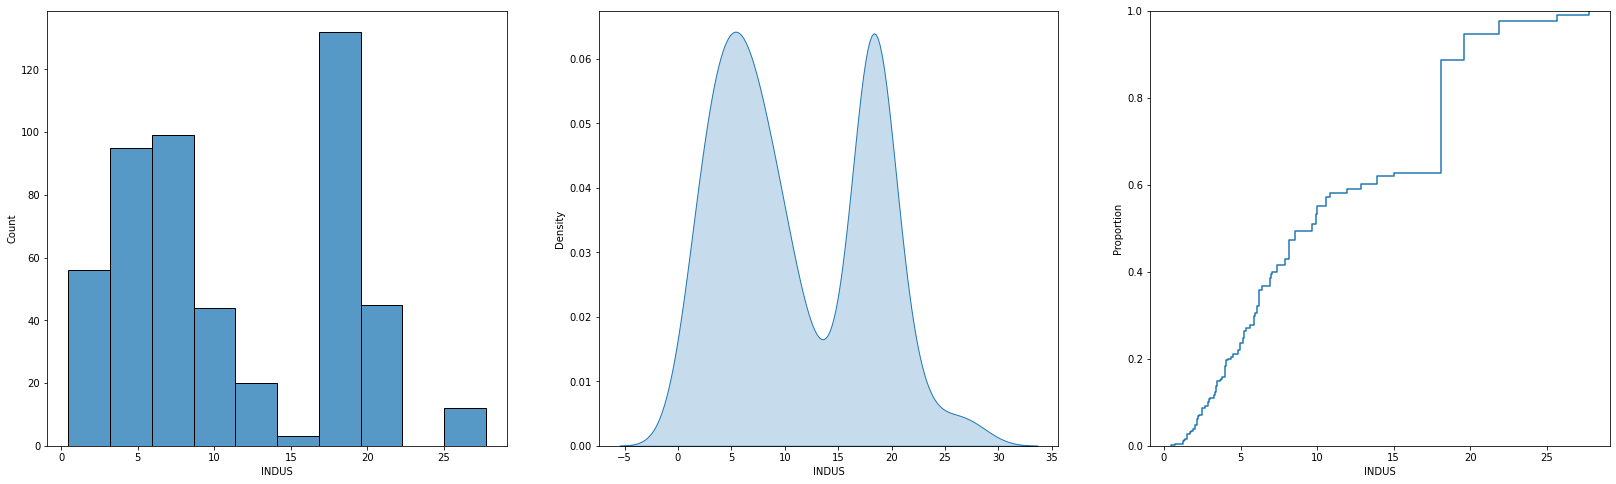

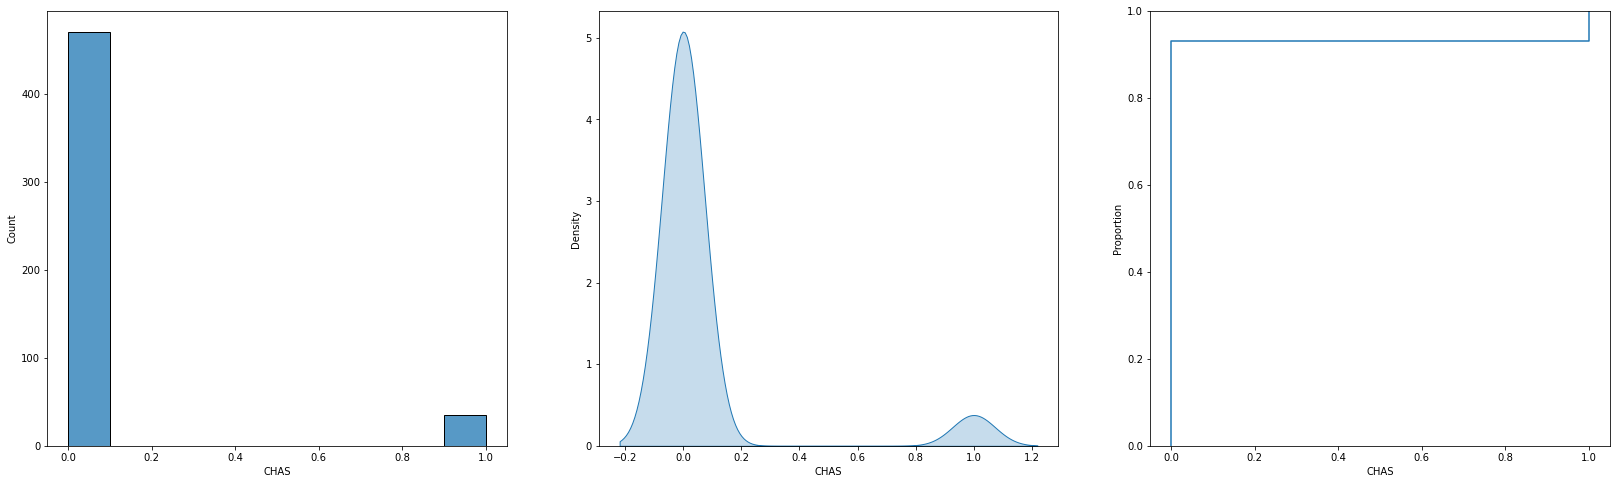

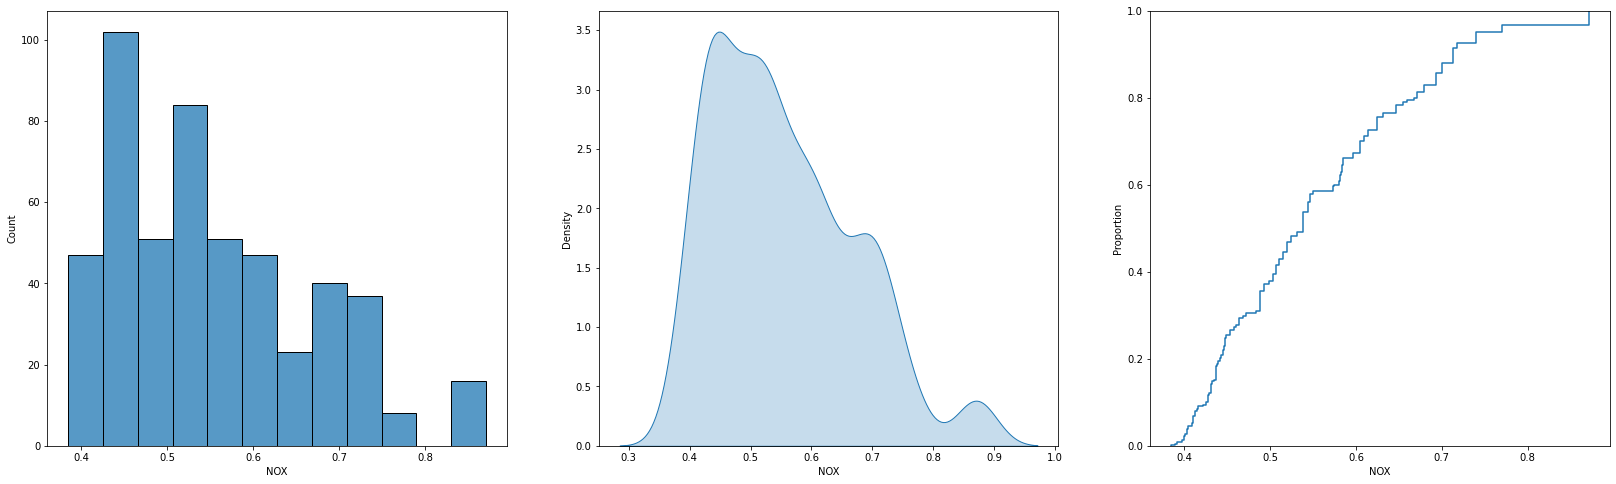

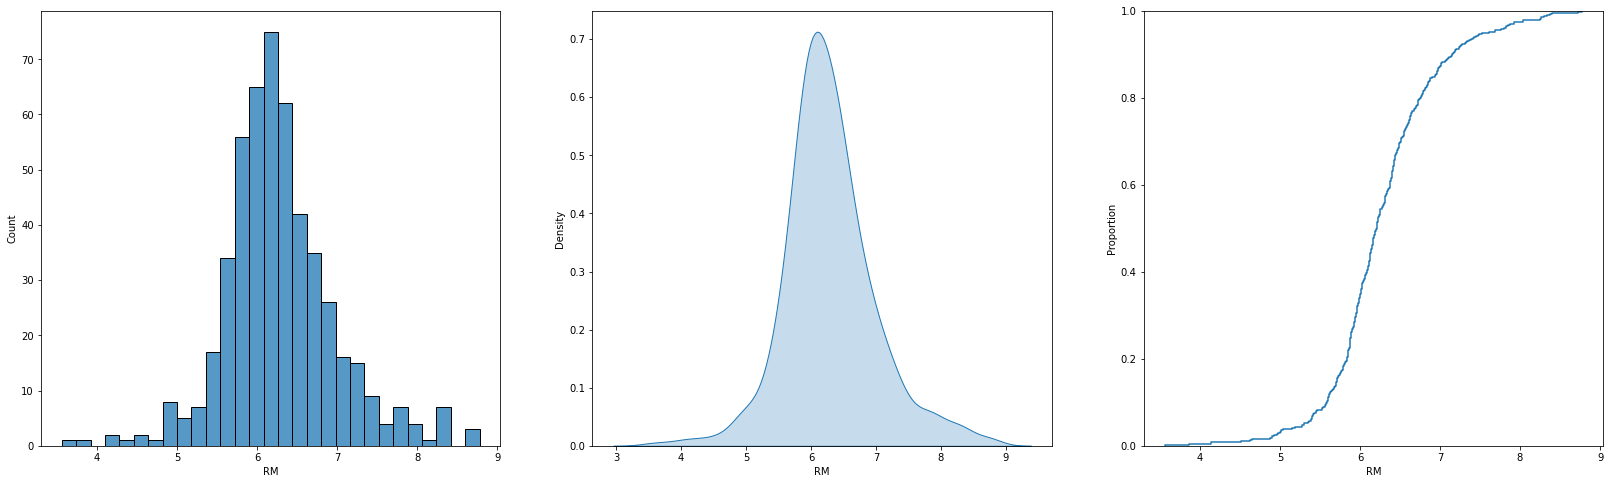

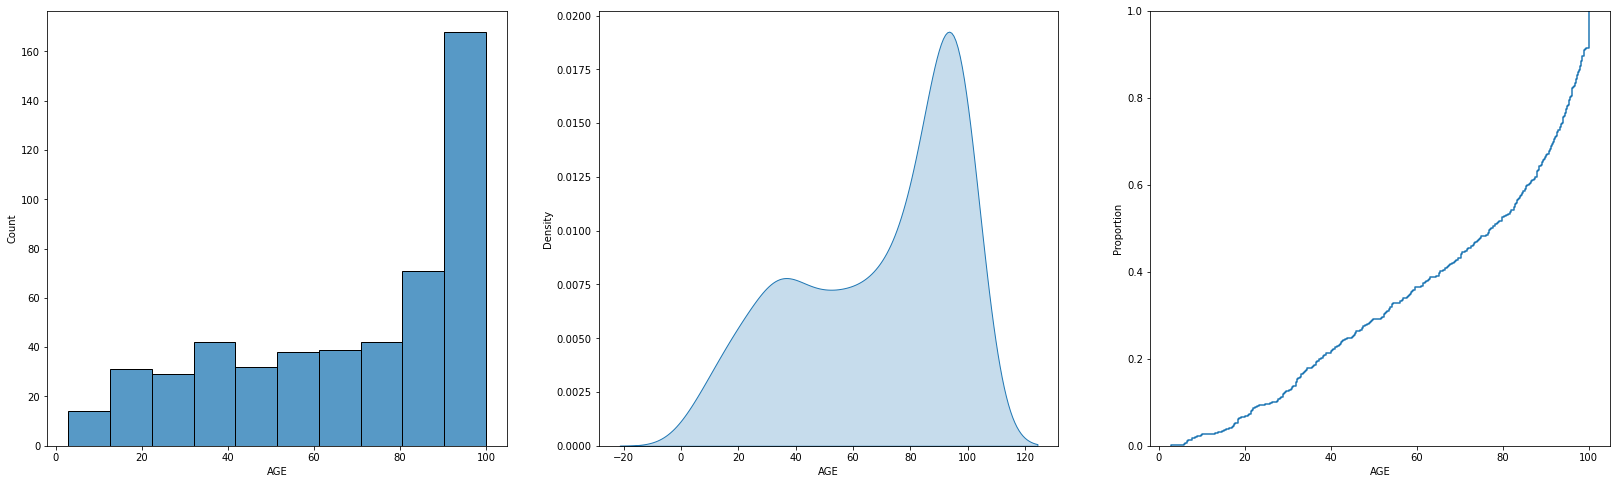

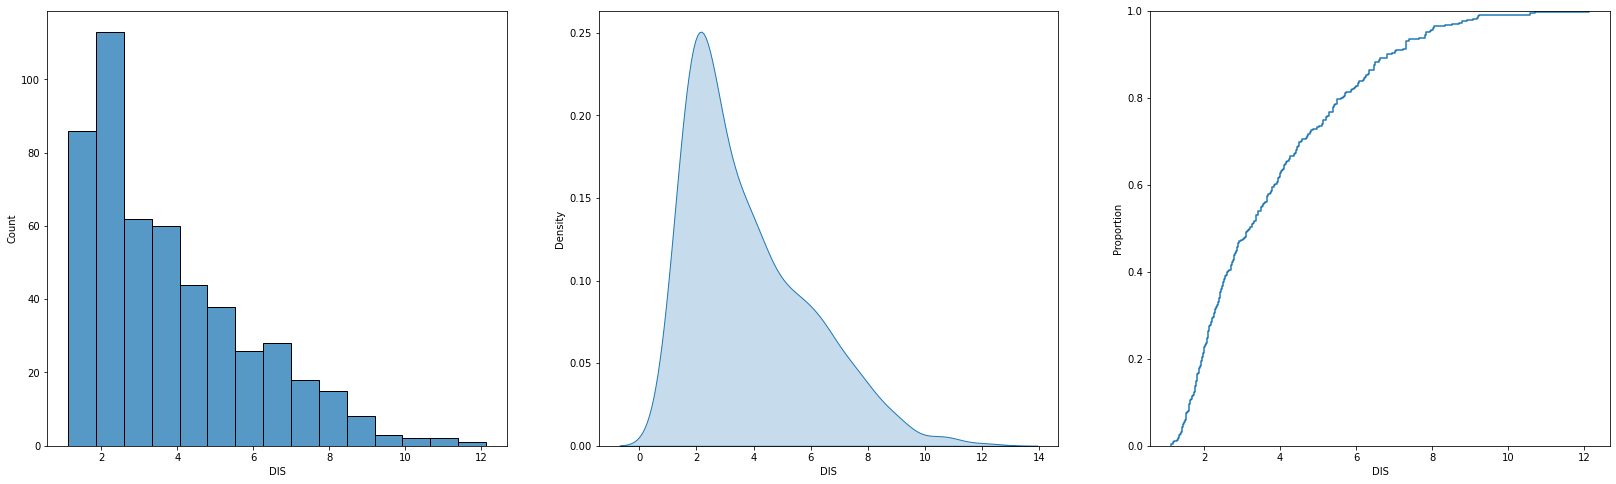

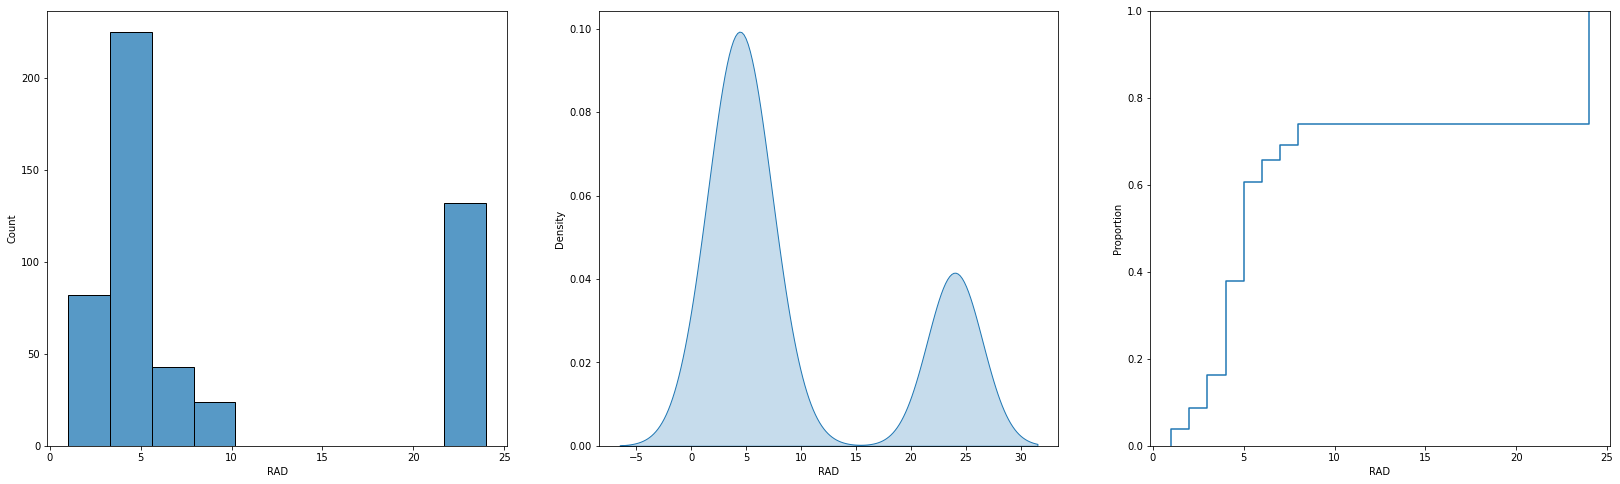

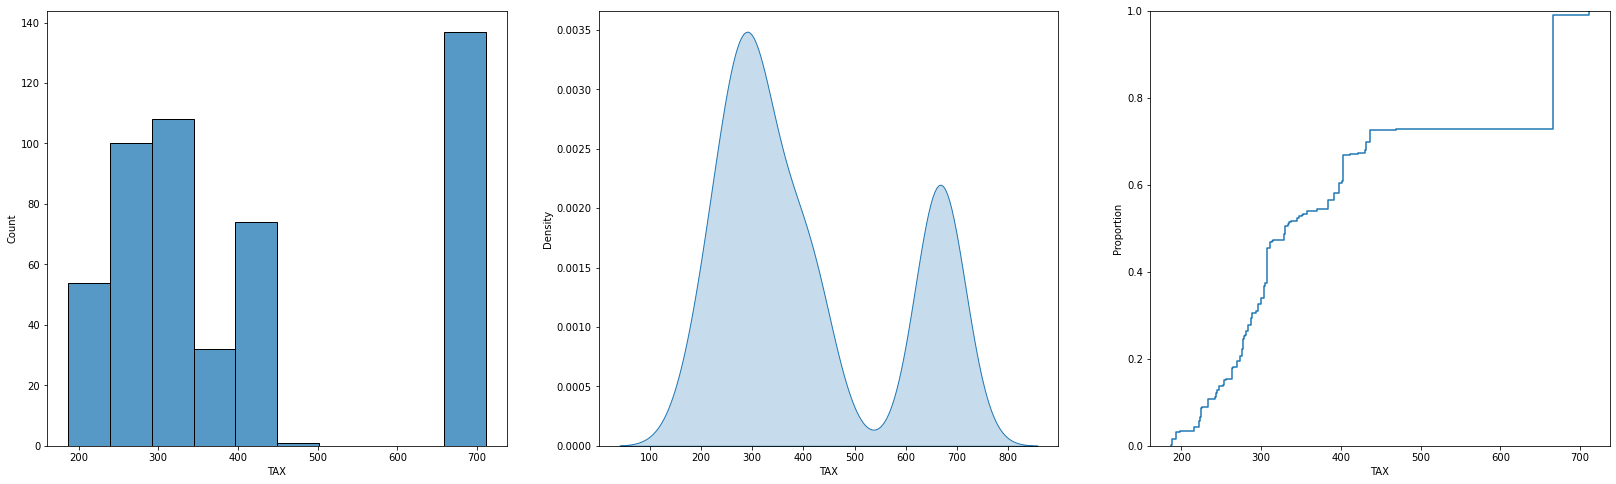

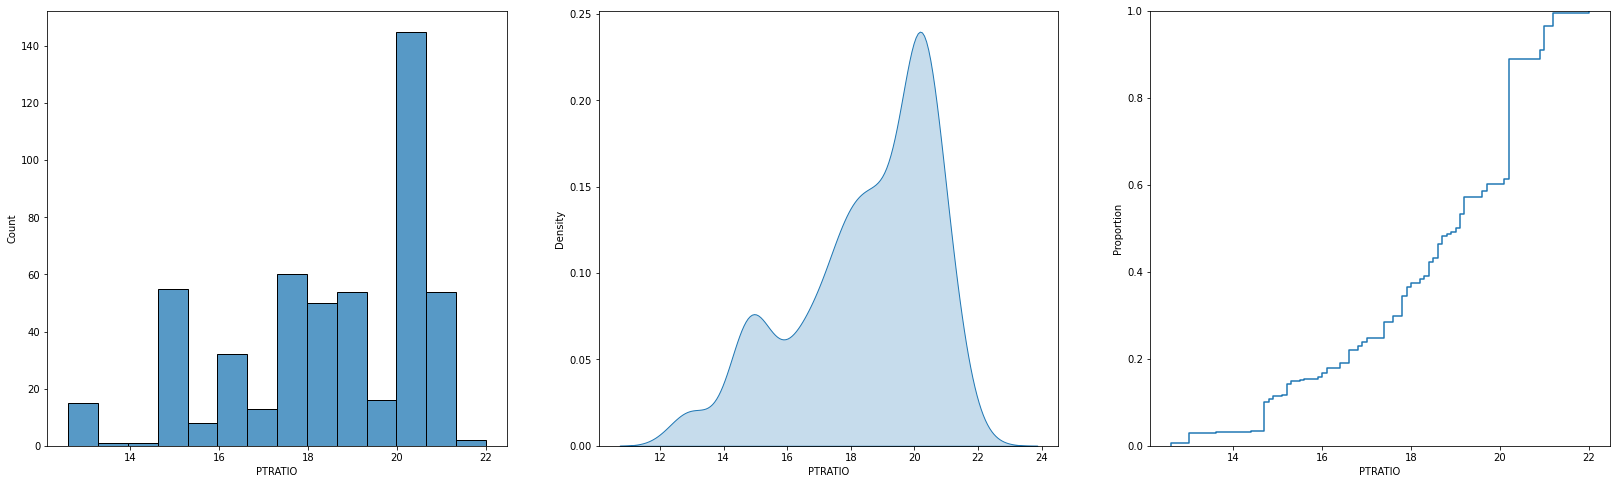

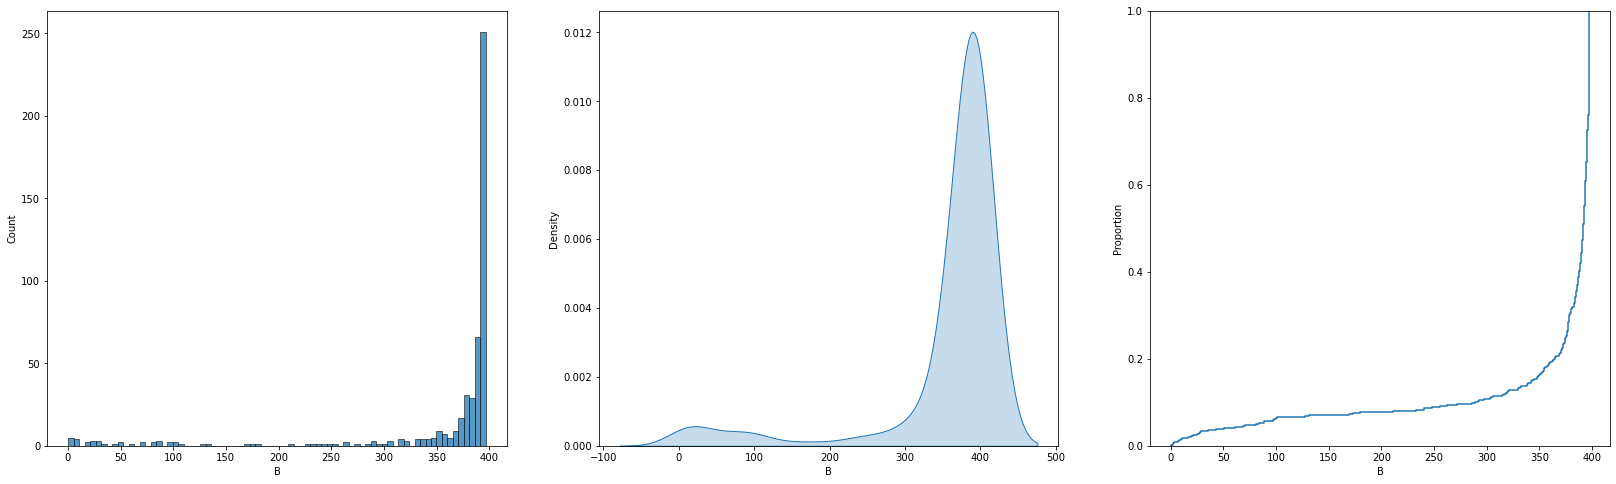

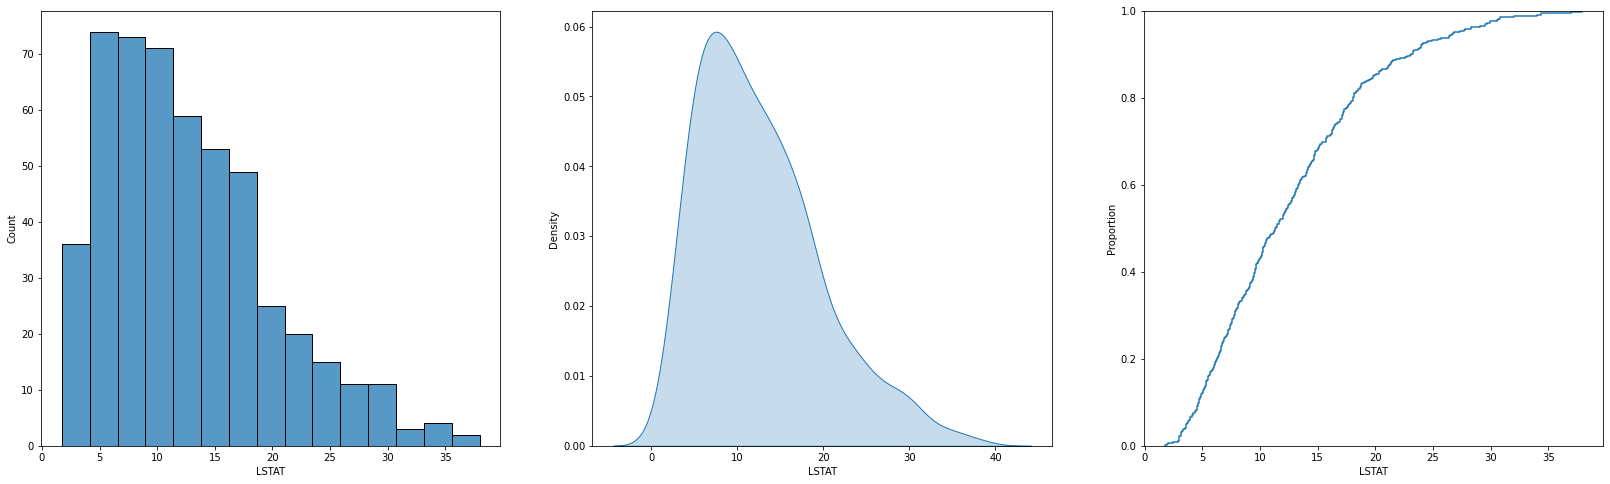

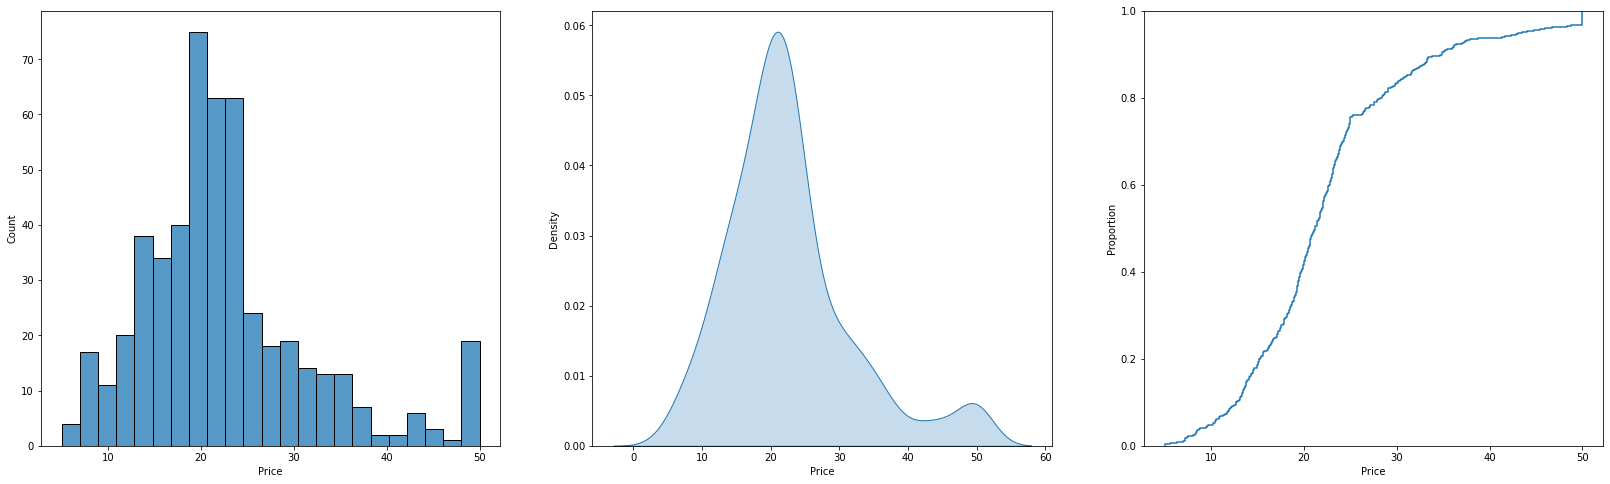

In [14]:
# check
univariate_plots(df)

## Correlation Analysis

### Correlation Table with Target

In [15]:
def corr_with_target(data, target_column):
    
    """
    
    This function will return correlation of each column with target
    
    """
    
    ### Extract Numeric Column
    numCols = extractNumCol(data)
    
    ### Save Data in Dict
    corr_dict = {}
    
    for nc in numCols:
        
        # Find a Correlation
        corr_val = data[nc].corr(data[target_column])
        
        # Add Column Name
        corr_dict[nc] = corr_val
    
    ### Build a Corr Table
    corr_table = pd.DataFrame(corr_dict.items(), columns=['Columns', target_column])
    
    ### Graphics
    plt.figure(figsize=(8, 12))
    heatmap = sns.heatmap(data.corr()[[target_column]].sort_values(by=target_column, ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Features Correlating with Target - '+''+target_column, fontdict={'fontsize':18}, pad=16);
    
    corr_table = corr_table.set_index('Columns')
    return corr_table.T

Columns,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
Price,-0.388305,0.360445,-0.483725,0.17526,-0.427321,0.69536,-0.376955,0.249929,-0.381626,-0.468536,-0.507787,0.333461,-0.737663,1.0


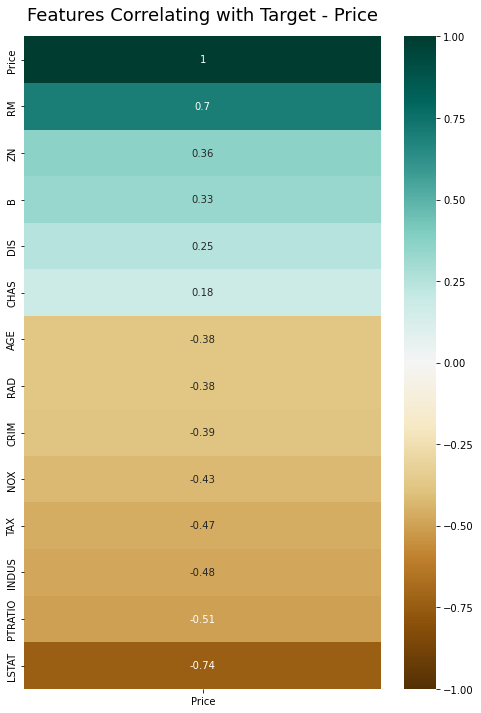

In [16]:
# check
corr_with_target(df, 'Price')

### Heatmap

In [17]:
def corr_heatmap(data):
    plt.figure(figsize=(16, 6))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
    heatmap = sns.heatmap(data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
    heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

C:\Users\akash\AppData\Local\Temp/ipykernel_72568/3960524516.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


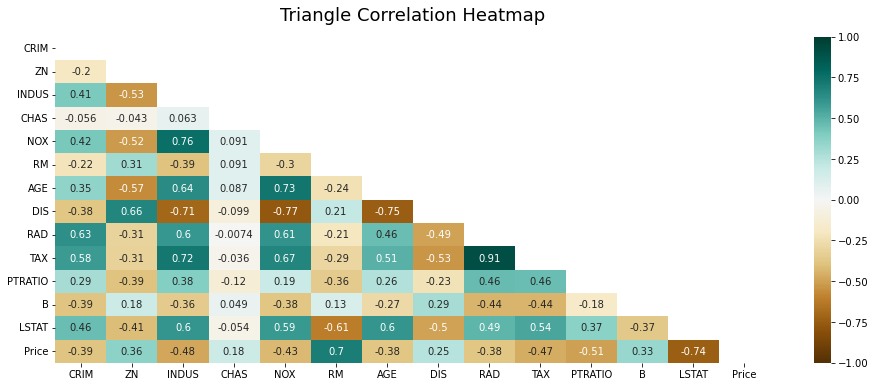

In [18]:
# check
corr_heatmap(df)

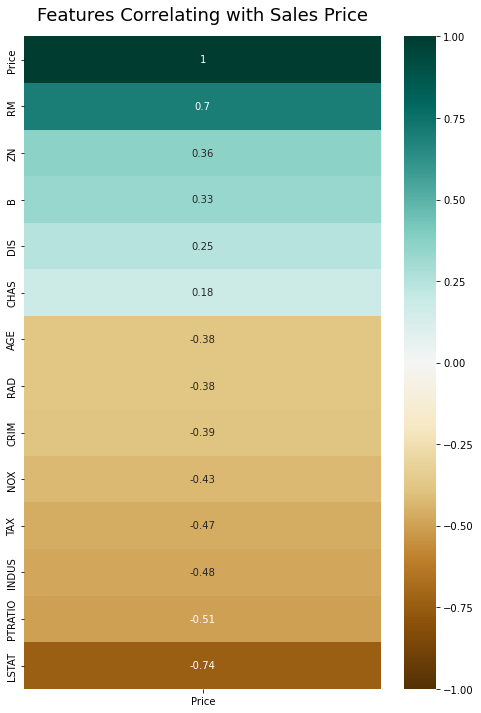

In [19]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Price']].sort_values(by='Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

## Scatter Plot

In [20]:
def plot_scatter(data, target_column, num_col):
    
    # initialize plot counter
    count = 1
    
    # Set Grid
    fig = plt.figure(figsize=(15,60), constrained_layout = True)
    
    for i in df.columns.to_list():
        plt.subplot(len(data.columns), num_col, count)
        plt.scatter(data[i], data[target_column])
        plt.title('{}, subplot: {}{}{}'.format(i, len(data.columns), num_col, count))
        plt.xlabel(i)
        
        # Increment Counter
        count = count + 1
    
    ## Show
    plt.show()

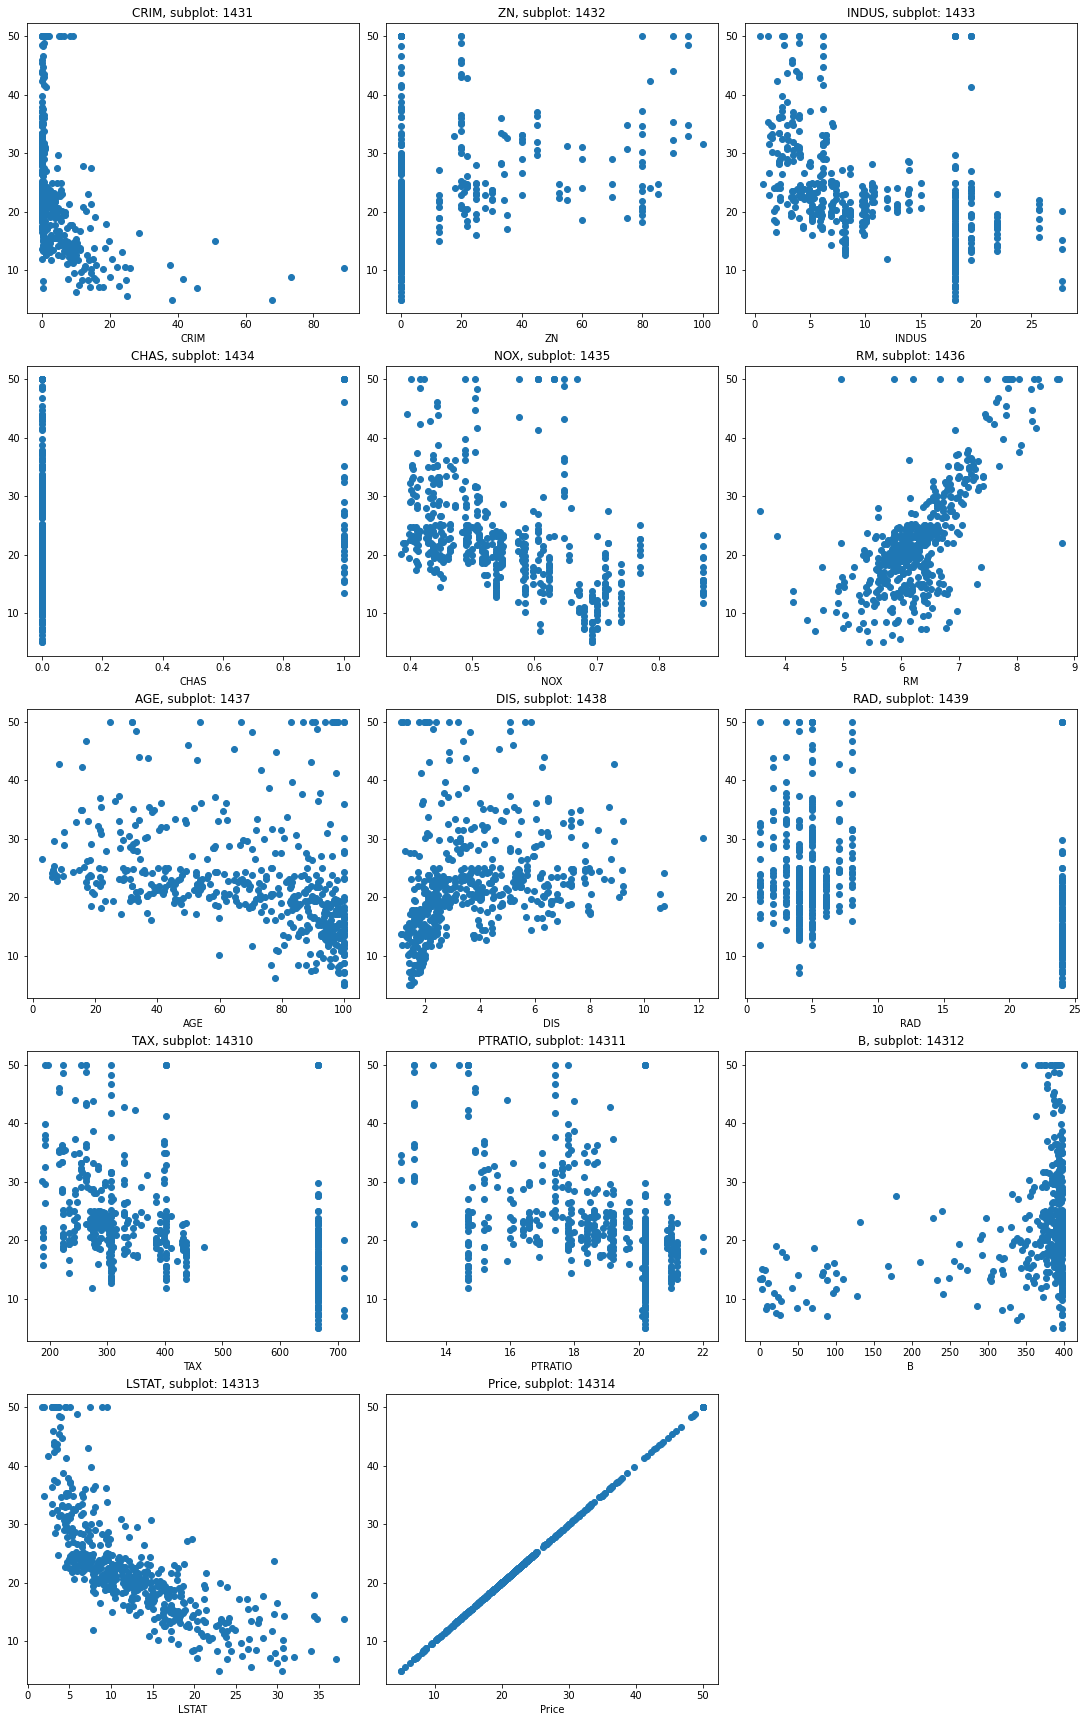

In [21]:
# check
plot_scatter(df, 'Price', 3)

# Data Prep for ML

## DV & IV

In [22]:
def break_dv_iv(data, target_column):
    
    ### Independent Variable
    iv = data.loc[:, ~data.columns.isin([target_column])]
    
    ### Dependent Variable
    dv = data[target_column].copy()
    
    return iv, dv

In [23]:
# check
iv, dv = break_dv_iv(df, 'Price')

In [24]:
iv.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [25]:
dv.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

## Train Test Split

In [26]:
def smart_split(data, test_size, target_col, random_state):
    """
    Split the data into train and test sets.
    """
    # Shuffle the data
    data = data.sample(frac=1, random_state=random_state)
    
    # Calculate the index for the split
    split_index = int(data.shape[0] * (1 - test_size))
    
    # Split the data
    X_train = data.iloc[:split_index, :-1]
    X_test = data.iloc[split_index:, :-1]
    y_train = data.iloc[:split_index, -1]
    y_test = data.iloc[split_index:, -1]
    
    return X_train, X_test, y_train, y_test

In [27]:
# check
X_train, X_test, y_train, y_test = smart_split(df, 0.3, 'Price', 42)

In [28]:
X_train.shape

(354, 13)

In [29]:
X_test.shape

(152, 13)

## Standardize Data

In [30]:
def standardize(df):
    """
    Standardize the data in the DataFrame.
    """
    # Store the column names
    col_names = df.columns
    
    # Create a copy of the DataFrame
    df_std = df.copy()
    
    # Standardize the data
    df_std = (df_std - df_std.mean()) / df_std.std()
    
    # Set the column names
    df_std.columns = col_names
    
    return df_std.values

In [31]:
# Standardize X_train
X_train = standardize(X_train)

# Standardize X_test
X_test = standardize(X_test)

In [32]:
X_train

array([[-0.39907538, -0.47732329, -1.03325441, ..., -0.87306086,
         0.4219452 , -0.52122579],
       [-0.40275549,  1.18293163, -0.69400557, ..., -0.40534969,
         0.43741798, -1.26989053],
       [-0.39762166, -0.47732329,  2.37217143, ...,  0.76392825,
         0.36237499,  0.7057148 ],
       ...,
       [-0.3847142 , -0.47732329, -0.09313263, ...,  0.06236149,
         0.41498245, -0.25898932],
       [-0.40225043,  0.35280417, -1.13675405, ..., -1.66816986,
         0.21825708, -1.34054492],
       [-0.4036146 ,  2.84318655, -1.09219171, ..., -0.9666031 ,
         0.39309951, -0.85683412]])

In [33]:
X_test

array([[ 1.42435701, -0.51389902,  1.08291559, ...,  0.79274441,
        -3.5698927 ,  2.06985706],
       [-0.50583903, -0.51389902, -1.31196876, ...,  0.12107691,
         0.44661228, -1.03120417],
       [-0.51546208,  3.67319958, -1.07578984, ..., -1.13270244,
         0.33360694, -1.36768295],
       ...,
       [-0.51552842,  3.2079664 , -1.33754228, ..., -0.64014627,
         0.38283275, -0.93116993],
       [ 1.48284481, -0.51389902,  1.08291559, ...,  0.79274441,
        -2.62518522,  1.68790817],
       [-0.47720296, -0.51389902, -0.35220983, ...,  1.10618925,
        -3.04306953, -0.22789896]])

# ML (Machine Learning)

## Linear Regression

In [34]:
# Create the linear regression model
reg_model = LinearRegression()

# Fit Regression Model on Training Data
reg_model.fit(X_train,y_train)

LinearRegression()

In [35]:
# Coefficient
reg_model.coef_

array([-1.1087279 ,  1.48757605, -0.03831262,  0.58250594, -2.11797404,
        2.42131742,  0.40528101, -3.41925358,  3.20005477, -2.62853061,
       -1.88620563,  0.65085839, -4.14051845])

In [36]:
# Coefficient
reg_model.intercept_

22.376836158192134

In [37]:
## on which parameters the model has been trained
reg_model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [38]:
### Prediction With Test Data
reg_pred=reg_model.predict(X_test)

In [39]:
reg_pred

array([11.79576037, 27.6717629 , 38.8421271 , 21.13015499, 24.67158951,
       38.39929957, 17.77780328, 24.43897188, 15.36975012, 23.27923094,
       35.09025621, 33.32307939, 23.84761812, 18.46104212, 16.72865265,
        7.2495658 , 41.02582913, 18.18277199, 30.95830331, 18.30398523,
       14.0539268 , 19.1058866 , 24.16322352, 35.01409173, 27.20707865,
       40.18872681, 11.74026568, 12.56693846, 24.2041169 , 16.28860239,
       18.22274918, 28.0813039 ,  8.93441573, 22.98205385, 16.51382622,
       22.57026579, 30.79658505, 19.14218707, 12.60352751, 35.51727463,
       14.44498455, 16.64421034, 19.34050642, 25.28423961, 35.48299041,
       11.07181217, 26.7418962 , 18.87552782, 29.58312741, 16.6484647 ,
       21.31570281, 27.06896577, 18.54977792, 24.40543245, 19.63044436,
       18.84153257, 32.54440288, 19.86099612, 25.28011941, 29.58494397,
       36.77130405, 23.35748508, 28.05525452, 15.81072318, 30.15416017,
       23.39422196, 35.75801921, 18.3638714 , 23.06658921, 12.69

### Performance Metrics

In [326]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_regression_performance(y_test, y_pred):
    
    """
    Calculate various performance metrics for a linear regression model.
    
    Parameters:
    - y_test: a NumPy array of the true values of the dependent variable
    - y_pred: a NumPy array of the predicted values of the dependent variable
    - X_test: a NumPy array of the true values of the independent variable
    
    Returns:
    - mae: the mean absolute error of the model
    - mse: the mean squared error of the model
    - rmse: the root mean squared error of the model
    - mape: mape of the model
    - r2: the R-squared value of the model
    - adjusted r2: Adjusted R-squared value of the model
    - Explained Variance Score: returns the explained variance score as a float value between -inf and 1.
    
    """
    # Calculate the mean absolute error
    mae = mean_absolute_error(y_test, y_pred)
    
    # Calculate the mean squared error
    mse = mean_squared_error(y_test, y_pred)
    
    # Calculate the root mean squared error
    rmse = np.sqrt(mse)
    
    # mape
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Explained Variance Score
    evs = explained_variance_score(y_test, y_pred)
    
    # Calculate the R-squared value
    r2 = r2_score(y_test, y_pred)
    
    # Adjusted R2
    n = len(y_test)
    y_pred_df = pd.DataFrame(y_pred)
    p = len(y_pred_df.columns)
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    

    
    return mae, mse, rmse, mape, evs, r2, adjusted_r2

### Regression Plots

In [690]:
def reg_plots(train_df, test_df, y_train, y_train_pred, y_test, y_test_pred, random_search, X_data, y_data):
    
    
    # Create a figure and axis
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(15, 10))
    axes = [ax1, ax2, ax3, ax4, ax5, ax6]

    ### 1. Perfect Prediction
    ax1.set_title('Perfect Prediction with Regression Line')
    ax1.plot(y_train, y_train_pred, '.', label='Training')
    ax1.plot(y_test, y_test_pred, '.', label='Testing')
    
    # Plot the perfect prediction line
    x_min = min(y_train.min(), y_test.min())
    x_max = max(y_train.max(), y_test.max())
    ax1.plot([x_min, x_max], [x_min, x_max], '--k', label='Perfect Prediction')
    
    #Add the labels and legend
    ax1.set_xlabel('Actual')
    ax1.set_ylabel('Predicted')
    ax1.legend()
    
    ### 2. Training & Testing Error
    ax2.set_title('Training & Testing Error')
    sns.regplot(x='predicted', y='error', data=train_df, fit_reg=False, label='Training error', ax=ax2)
    sns.regplot(x='predicted', y='error', data=test_df, fit_reg=False, label='Testing error', ax=ax2)
    ax2.legend()
    
    ### 3. QQ Plot on Residual
    ax3.set_title('Distribution of Residuals')
    sns.histplot(test_df['error'].values, label='Residuals', kde=True, ax=ax3)
    ax3.legend()
    
    ### 4. Training & Testing Score with Alpha
    ax4.set_title('Training Score Vs Testing Score')
    ax4.plot(random_search.cv_results_['mean_train_score'], label='Training Score')
    ax4.plot(random_search.cv_results_['mean_test_score'], label='Testing Score')
    ax4.legend()
    
    ### 5. Scale - Location Plot to check Homoscedasticity
    """It’s good if you see a horizontal line with equally (randomly) spread points."""
    ax5.set_title('Scale Location Plot (Homoscedasticity)')
    ax5.plot(test_df['predicted'], np.sqrt(np.abs(test_df['error'])), 'o')
    ax5.set_xlabel('Fitted values')
    ax5.set_ylabel('Square root of absolute residuals')
    
    # Add a horizontal line at Middle
    # Calculate the middle of the y-axis
    y_middle = np.mean(np.sqrt(np.abs(test_df['error'])))
    ax5.axhline(y=y_middle, color='r', linestyle='-')
    
    ### 6. Learning Curve Plots
    # Calculate the training error and validation error for different training set sizes
    train_sizes, train_errors, val_errors = learning_curve(random_search, X_data, y_data)

    # Calculate the bias, variance, and total error for each training set size
    bias = np.mean(train_errors, axis=1) - np.mean(val_errors, axis=1)
    variance = np.var(val_errors, axis=1)
    error = np.mean(val_errors, axis=1)
    
    # Plot the bias, variance, and total error as a function of the training set size
    ax6.set_title('Bias Variance Tradeoff')
    ax6.plot(train_sizes, bias, label='Bias')
    ax6.plot(train_sizes, variance, label='Variance')
    ax6.plot(train_sizes, error, label='Total error')
    ax6.legend(loc='upper right')
    ax6.set_xlabel('Training set size')
    ax6.set_ylabel('Error')
    plt.show()

### Regression Function (Without CV)

In [705]:
def regression_without_cv(data, test_size, target_col, random_state):
    
    """
    Perform linear regression on the given data.
    
    Parameters:
    - data: Data with IV & DV
    - test_size: the proportion of the data to use for testing
    - target_column: Name of DV
    - random_state: the random seed for the train/test split (default is 42)
    
    Returns:
    - y_pred: a NumPy array of the predicted values of the dependent variable for the test set
    - mse: the mean squared error of the model
    - r2: the R-squared value of the model
    
    """
    
    ### Save Performance Metric
    performance_metrics = {}
    
    ### X & Y Data
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    
    ### Break Data into Train & Test Category
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create the linear regression model
    reg_model = LinearRegression()
    
    # Fit the model to the training data
    reg_model.fit(X_train, y_train)
    
    # Finding a coefficients of the columns
    coef = list(reg_model.coef_)
    Xcols = [c for c in data.columns.to_list() if c != target_col]
    coef_df = pd.DataFrame({'Variables': Xcols, 'Coefficient':coef})
    
    # Intercept
    intercept_info = reg_model.intercept_
    print(f"Intercept at := {intercept_info}")
    
    # Train Pred
    y_train_pred = reg_model.predict(X_train)
    
    # Performance on Train Data
    mae_train, mse_train, rmse_train, mape_train, evs_train, r2_train, r2_adj_train = evaluate_regression_performance(y_train, y_train_pred)
    
    # Test Pred
    y_test_pred = reg_model.predict(X_test)
    
    ### Actual Vs Predicted DataFrame
    act_pred = pd.DataFrame({'Y Test (Actual)': y_test, 'Y Hat (Predicted)': y_test_pred, 
                             'Residual': y_test-y_test_pred, 'Residual Square':(y_test-y_test_pred)**2 }).reset_index(drop=True)
    
    
    # Performance Metrics on Test Data
    mae_test, mse_test, rmse_test, mape_test, evs_test, r2_test, r2_adj_test = evaluate_regression_performance(y_test, y_test_pred)
    
    # Append
    performance_metrics['MAE'] = [mae_train, mae_test]
    performance_metrics['MSE'] = [mse_train, mse_test]
    performance_metrics['RMSE'] = [rmse_train, rmse_test]
    performance_metrics['MAPE'] = [mape_train, mape_test]
    performance_metrics['Explained Variance'] = [evs_train, evs_test]
    performance_metrics['R2'] = [r2_train, r2_test]
    performance_metrics['Adjusted R2'] = [r2_adj_train, r2_adj_test]
    
    ### Performance Metrics DF
    performance_metrics = pd.DataFrame(performance_metrics).T
    performance_metrics.columns = ['LR (Train)', 'LR (Test)']
    
    # calculate errors
    train_error = y_train - y_train_pred
    test_error = y_test - y_test_pred
    
    # create a dataframe with actual and predicted values
    train_df = pd.DataFrame({'actual': y_train, 'predicted': y_train_pred, 'error': train_error})
    test_df = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred, 'error': test_error})
    
    ### Plot Regressions Plots
    #reg_plots(train_df, test_df, y_train, y_train_pred, y_test, y_test_pred, reg_model, X, y)
    
    return performance_metrics, coef_df, act_pred, reg_model

In [706]:
%%time
metrics, coeff_table, actual_pred, mod = regression_without_cv(data=df, test_size=0.3, target_col='Price', random_state=42)

Intercept at := 31.631084035693565
Wall time: 15 ms


In [707]:
metrics

,LR (Train),LR (Test)
MAE,3.356827,3.162710
MSE,22.545481,21.517444
RMSE,4.748208,4.638690
MAPE,16.566130,16.521222
Explained Variance,0.743500,0.711307
R2,0.743500,0.711226
Adjusted R2,0.742771,0.709301


In [708]:
coeff_table

,Variables,Coefficient
0,CRIM,-0.133470
1,ZN,0.035809
2,INDUS,0.049523
3,CHAS,3.119835
4,NOX,-15.417061
5,RM,4.057199
6,AGE,-0.010821
7,DIS,-1.385998
8,RAD,0.242727
9,TAX,-0.008702


In [709]:
actual_pred

,Y Test (Actual),Y Hat (Predicted),Residual,Residual Square
0,23.6,28.648960,-5.048960,25.491998
1,32.4,36.495014,-4.095014,16.769138
2,13.6,15.411193,-1.811193,3.280421
3,22.8,25.403213,-2.603213,6.776718
4,16.1,18.855280,-2.755280,7.591567
...,...,...,...,...
147,17.1,17.403672,-0.303672,0.092216
148,14.5,13.385941,1.114059,1.241127
149,50.0,39.983425,10.016575,100.331779
150,14.3,16.682863,-2.382863,5.678036


## Polynomial Regression

### Ridge Regression

In [714]:
def ridge_with_rs(data, target_col, cv=5, n_iter=10, test_size=0.2, random_state=42):
    
    ### Save Performance Metric
    performance_metrics = {}
    
    ### Ridge Regression Object
    model = Ridge()
    
    ### Param Distribution
    
    param_distributions = {
        "alpha": uniform(0.1, 0.9),  # hyperparameter to control the strength of the regularization
        "fit_intercept": [True, False],  # whether to include an intercept term in the model
        "solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg", "sag", "saga"],  # solver to use
        "tol": uniform(1e-4, 1e-2),  # tolerance for the solver
        "max_iter": [100, 200, 300, 400, 500]  # maximum number of iterations for the solver
    }
    
    ### Random Search Object
    rs = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=cv, random_state=random_state, return_train_score=True)
    
    ### X & Y Data
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    
    ### Break Data into Train & Test Category
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    ### Fit a Model to Train
    rs.fit(X_train, y_train)
    
    ### Printing Best Params
    best_params = rs.best_params_
    print(best_params)
    
    ### Train Pred
    y_train_pred = rs.predict(X_train)
    
    ### Training Performance Metrics
    mae_train, mse_train, rmse_train, mape_train, evs_train, r2_train, r2_adj_train = evaluate_regression_performance(y_train, y_train_pred)
    
    
    ### Test Pred
    y_test_pred = rs.predict(X_test)

    ### Testing Performance Metrics
    mae_test, mse_test, rmse_test, mape_test, evs_test, r2_test, r2_adj_test = evaluate_regression_performance(y_test, y_test_pred)
    
    
    # Append
    performance_metrics['MAE'] = [mae_train, mae_test]
    performance_metrics['MSE'] = [mse_train, mse_test]
    performance_metrics['RMSE'] = [rmse_train, rmse_test]
    performance_metrics['MAPE'] = [mape_train, mape_test]
    performance_metrics['Explained Variance'] = [evs_train, evs_test]
    performance_metrics['R2'] = [r2_train, r2_test]
    performance_metrics['Adjusted R2'] = [r2_adj_train, r2_adj_test]
    
    ### Performance Metrics DF
    performance_metrics = pd.DataFrame(performance_metrics).T
    performance_metrics.columns = ['Ridge (Train)', 'Ridge (Test)']


    # calculate errors
    train_error = y_train - y_train_pred
    test_error = y_test - y_test_pred
    
    # create a dataframe with actual and predicted values
    train_df = pd.DataFrame({'actual': y_train, 'predicted': y_train_pred, 'error': train_error})
    test_df = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred, 'error': test_error})
    
    
    ## Plot Regressions Plots
    reg_plots(train_df, test_df, y_train, y_train_pred, y_test, y_test_pred, rs, X, y)

    # Create a dataframe with the actual and predicted values for the training and test sets
    act_vs_pred = pd.DataFrame({"Actual": np.concatenate([y_train, y_test]),
                            "Predicted": np.concatenate([y_train_pred, y_test_pred])},
                           index=np.concatenate([X_train.index, X_test.index]))

    return act_vs_pred, performance_metrics, best_params

{'alpha': 0.501249477568232, 'fit_intercept': True, 'max_iter': 300, 'solver': 'cholesky', 'tol': 0.008761761457749352}


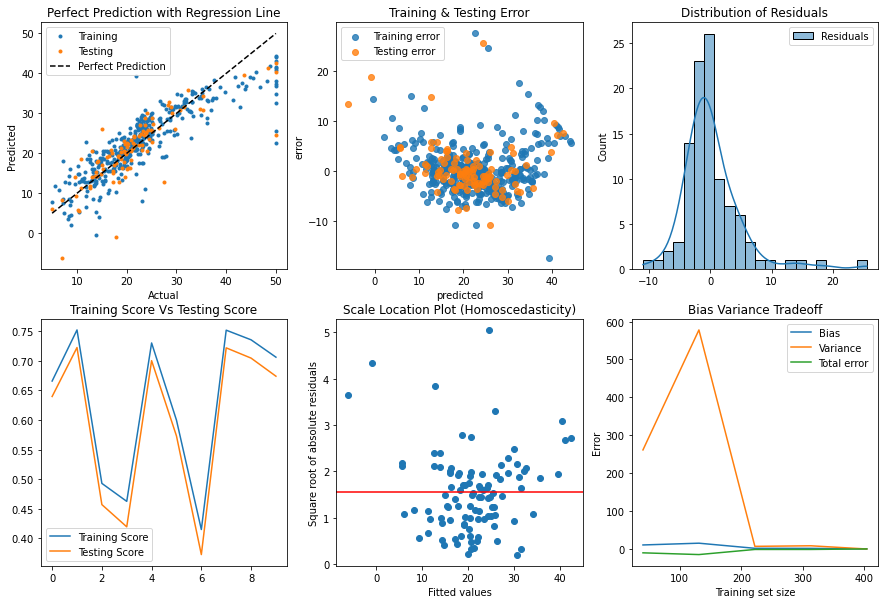

In [715]:
# check
a, b, c = ridge_with_rs(df, 'Price')

### Lasso Regression

In [720]:
def lasso_with_rs(data, target_col, cv=5, n_iter=10, test_size=0.2, random_state=42):
    
    ### Save Performance Metric
    performance_metrics = {}
    
    ### Ridge Regression Object
    model = Lasso()
    
    # define the hyperparameter distribution
    
    param_distributions = {
        "alpha": np.logspace(-3, 3, 7),
        "tol": np.logspace(-3, 3, 7),
        "max_iter": [100, 1000, 10000, 100000],
        "selection": ["cyclic", "random"]
    }
    
    ### Random Search Object
    rs = RandomizedSearchCV(model, param_distributions, n_iter=n_iter, cv=cv, random_state=random_state, return_train_score=True)
    
    ### X & Y Data
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    
    ### Break Data into Train & Test Category
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    ### Fit a Model to Train
    rs.fit(X_train, y_train)
    
    ### Printing Best Params
    best_params = rs.best_params_
    print(best_params)
    
    ### Train Pred
    y_train_pred = rs.predict(X_train)
    
    ### Training Performance Metrics
    mae_train, mse_train, rmse_train, mape_train, evs_train, r2_train, r2_adj_train = evaluate_regression_performance(y_train, y_train_pred)
    
    
    ### Test Pred
    y_test_pred = rs.predict(X_test)

    ### Testing Performance Metrics
    mae_test, mse_test, rmse_test, mape_test, evs_test, r2_test, r2_adj_test = evaluate_regression_performance(y_test, y_test_pred)
    
    
    # Append
    performance_metrics['MAE'] = [mae_train, mae_test]
    performance_metrics['MSE'] = [mse_train, mse_test]
    performance_metrics['RMSE'] = [rmse_train, rmse_test]
    performance_metrics['MAPE'] = [mape_train, mape_test]
    performance_metrics['Explained Variance'] = [evs_train, evs_test]
    performance_metrics['R2'] = [r2_train, r2_test]
    performance_metrics['Adjusted R2'] = [r2_adj_train, r2_adj_test]
    
    ### Performance Metrics DF
    performance_metrics = pd.DataFrame(performance_metrics).T
    performance_metrics.columns = ['Lasso (Train)', 'Lasso (Test)']
    
    # calculate errors
    train_error = y_train - y_train_pred
    test_error = y_test - y_test_pred
    
    # create a dataframe with actual and predicted values
    train_df = pd.DataFrame({'actual': y_train, 'predicted': y_train_pred, 'error': train_error})
    test_df = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred, 'error': test_error})
    
    
    ## Plot Regressions Plots
    reg_plots(train_df, test_df, y_train, y_train_pred, y_test, y_test_pred, rs, X, y)


    # Create a dataframe with the actual and predicted values for the training and test sets
    act_vs_pred = pd.DataFrame({"Actual": np.concatenate([y_train, y_test]),
                            "Predicted": np.concatenate([y_train_pred, y_test_pred])},
                           index=np.concatenate([X_train.index, X_test.index]))


    return act_vs_pred, performance_metrics, best_params

{'tol': 0.001, 'selection': 'cyclic', 'max_iter': 100000, 'alpha': 0.001}


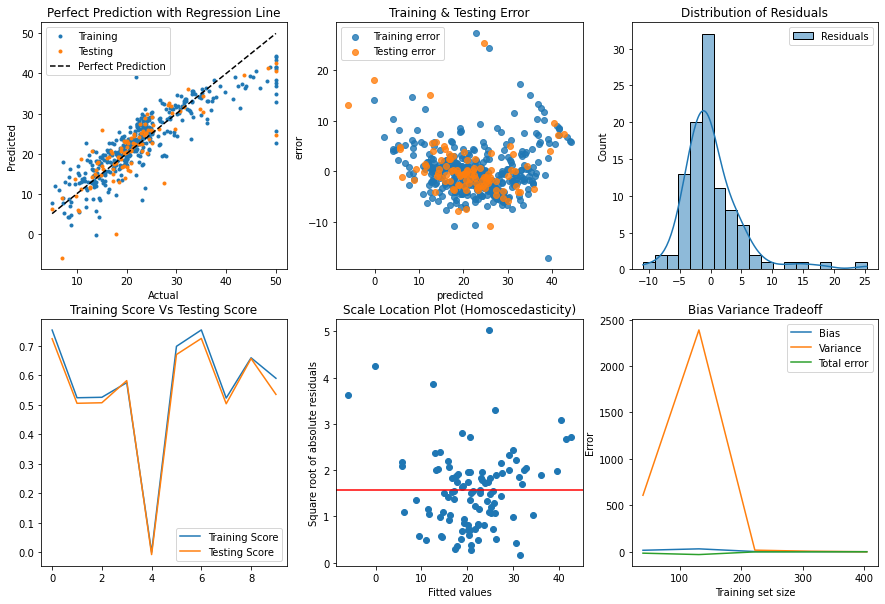

Wall time: 6.4 s


In [721]:
%%time
a, b, c = lasso_with_rs(df, 'Price')

In [722]:
a

,Actual,Predicted
477,12.0,10.945023
15,19.9,19.436576
332,19.4,23.065954
423,13.4,12.120107
19,18.2,18.389617
...,...,...
412,17.9,-0.209067
436,9.6,13.704223
411,17.2,16.148383
86,22.5,22.267903


In [723]:
b

,Lasso (Train),Lasso (Test)
MAE,3.312884,3.186231
MSE,21.641781,24.288837
RMSE,4.652073,4.928371
MAPE,16.566254,16.853724
Explained Variance,0.750881,0.669573
R2,0.750881,0.668791
Adjusted R2,0.750262,0.665479


In [724]:
c

{'tol': 0.001, 'selection': 'cyclic', 'max_iter': 100000, 'alpha': 0.001}

## KNN

In [725]:
def knn_regression_cv(data, target_col, test_size=0.2, random_state=42):
    """
    Perform KNN regression using RandomizedSearchCV.
    
    Parameters
    ----------
    data : pandas DataFrame
        The data to fit the model to.
    target_col : str
        The name of the target column in the data.
    test_size : float, optional
        The proportion of the data to use for testing, by default 0.2
    random_state : int, optional
        The random state to use for the RandomizedSearchCV object, by default 42
    
    Returns
    -------
    pandas DataFrame
        A dataframe containing the train and test performance metrics and the actual vs predicted values for the test data.
    """
    
    ### Store Performance Metrics
    performance_metrics = {}
    

    
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # define the model
    model = KNeighborsRegressor()
    
    # define the hyperparameter space
    param_distributions = {
        "n_neighbors": range(1, 51),
        "weights": ["uniform", "distance"],
        "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
        "leaf_size": range(1, 50),
        "p": [1, 2]
    }
    
    
    # create the randomized search object
    rs = RandomizedSearchCV(model, param_distributions, cv=5, scoring="neg_mean_squared_error", 
                                n_iter=50, random_state=random_state, return_train_score=True)
    
    # fit the model to the training data
    rs.fit(X_train, y_train)
    
    ### Printing Best Params
    best_params = rs.best_params_
    print(best_params)
    
    ### Train Pred
    y_train_pred = rs.predict(X_train)
    
    ### Training Performance Metrics
    mae_train, mse_train, rmse_train, mape_train, evs_train, r2_train, r2_adj_train = evaluate_regression_performance(y_train, y_train_pred)
    
    
    ### Test Pred
    y_test_pred = rs.predict(X_test)

    ### Testing Performance Metrics
    mae_test, mse_test, rmse_test, mape_test, evs_test, r2_test, r2_adj_test = evaluate_regression_performance(y_test, y_test_pred)
    
    
    # Append
    performance_metrics['MAE'] = [mae_train, mae_test]
    performance_metrics['MSE'] = [mse_train, mse_test]
    performance_metrics['RMSE'] = [rmse_train, rmse_test]
    performance_metrics['MAPE'] = [mape_train, mape_test]
    performance_metrics['Explained Variance'] = [evs_train, evs_test]
    performance_metrics['R2'] = [r2_train, r2_test]
    performance_metrics['Adjusted R2'] = [r2_adj_train, r2_adj_test]
    
    ### Performance Metrics DF
    performance_metrics = pd.DataFrame(performance_metrics).T
    performance_metrics.columns = ['KNN (Train)', 'KNN (Test)']
    
    # calculate errors
    train_error = y_train - y_train_pred
    test_error = y_test - y_test_pred
    
    # create a dataframe with actual and predicted values
    train_df = pd.DataFrame({'actual': y_train, 'predicted': y_train_pred, 'error': train_error})
    test_df = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred, 'error': test_error})
    
    
    ## Plot Regressions Plots
    reg_plots(train_df, test_df, y_train, y_train_pred, y_test, y_test_pred, rs, X, y)


    # Create a dataframe with the actual and predicted values for the training and test sets
    act_vs_pred = pd.DataFrame({"Actual": np.concatenate([y_train, y_test]),
                            "Predicted": np.concatenate([y_train_pred, y_test_pred])},
                           index=np.concatenate([X_train.index, X_test.index]))
    
    return act_vs_pred, performance_metrics, best_params

{'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'leaf_size': 7, 'algorithm': 'ball_tree'}


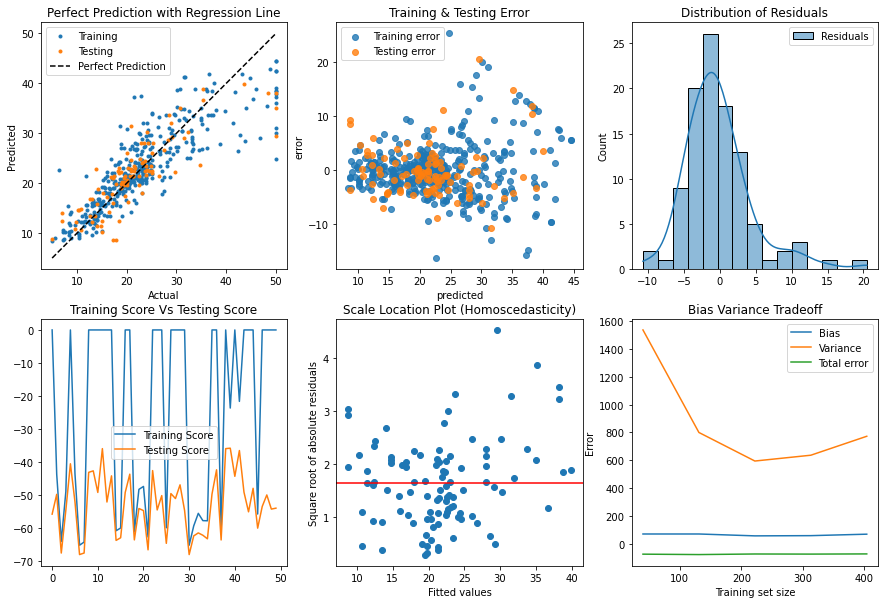

Wall time: 40.8 s


In [726]:
%%time
a, b, c = knn_regression_cv(df, 'Price')

In [727]:
a

,Actual,Predicted
477,12.0,14.58
15,19.9,20.32
332,19.4,21.74
423,13.4,12.06
19,18.2,19.80
...,...,...
412,17.9,8.70
436,9.6,10.76
411,17.2,8.70
86,22.5,21.36


In [728]:
b

,KNN (Train),KNN (Test)
MAE,3.294307,3.329804
MSE,23.512330,22.024353
RMSE,4.848951,4.693011
MAPE,15.107464,17.330904
Explained Variance,0.729357,0.700041
R2,0.729350,0.699670
Adjusted R2,0.728676,0.696666


In [729]:
c

{'weights': 'uniform',
 'p': 1,
 'n_neighbors': 5,
 'leaf_size': 7,
 'algorithm': 'ball_tree'}

## SVR

In [736]:
def svm_regression_cv(data, target_col, test_size=0.2, random_state=42):
    
    """
    Perform SVM regression (SVR) using RandomizedSearchCV.
    
    Parameters
    ----------
    data : pandas DataFrame
        The data to fit the model to.
    target_col : str
        The name of the target column in the data.
    test_size : float, optional
        The proportion of the data to use for testing, by default 0.2
    random_state : int, optional
        The random state to use for the RandomizedSearchCV object, by default 42
    
    Returns
    -------
    pandas DataFrame
        - A dataframe containing the train and test performance metrics and the 
        - A dataframe containing actual vs predicted values for the test data.
        - Dictionary with best parameters
    """
    
    # Store Performance Data
    performance_metrics = {}
    
    # split the data into X and y
    X = data.drop(target_col, axis=1)
    y = data[target_col]
    
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
        test_size=test_size,
        random_state=random_state
    )
    
    # define the parameter distribution for the RandomizedSearchCV object
    param_distributions = {
        "kernel": ["linear", "poly", "rbf", "sigmoid"],
        "degree": range(1, 11),
        "gamma": ["scale", "auto"],
        "C": [0.1, 1, 10, 100]
    }
    
    # create the SVM regressor object
    model = SVR()
    
    # create the RandomizedSearchCV object
    rs = RandomizedSearchCV(
        model,  # estimator
        param_distributions,  # parameter distribution
        n_iter=5, #nmber of iterations
        cv=5,  # number of folds
        scoring="neg_mean_squared_error",  # scoring metric
        random_state=random_state,
        verbose=True,
        return_train_score=True
    )
    
    # fit the RandomizedSearchCV object to the training data
    rs.fit(X_train, y_train)
    
    # get the best model from the RandomizedSearchCV object
    best_estimator = rs.best_estimator_
    print(best_estimator)
    
    ### Train Pred
    y_train_pred = rs.predict(X_train)
    
    ### Training Performance Metrics
    mae_train, mse_train, rmse_train, mape_train, evs_train, r2_train, r2_adj_train = evaluate_regression_performance(y_train, y_train_pred)
    
    
    ### Test Pred
    y_test_pred = rs.predict(X_test)

    ### Testing Performance Metrics
    mae_test, mse_test, rmse_test, mape_test, evs_test, r2_test, r2_adj_test = evaluate_regression_performance(y_test, y_test_pred)
    
    
    # Append
    performance_metrics['MAE'] = [mae_train, mae_test]
    performance_metrics['MSE'] = [mse_train, mse_test]
    performance_metrics['RMSE'] = [rmse_train, rmse_test]
    performance_metrics['MAPE'] = [mape_train, mape_test]
    performance_metrics['Explained Variance'] = [evs_train, evs_test]
    performance_metrics['R2'] = [r2_train, r2_test]
    performance_metrics['Adjusted R2'] = [r2_adj_train, r2_adj_test]
    
    ### Performance Metrics DF
    performance_metrics = pd.DataFrame(performance_metrics).T
    performance_metrics.columns = ['SVR (Train)','SVR (Test)']
    
    # calculate errors
    train_error = y_train - y_train_pred
    test_error = y_test - y_test_pred
    
    # create a dataframe with actual and predicted values
    train_df = pd.DataFrame({'actual': y_train, 'predicted': y_train_pred, 'error': train_error})
    test_df = pd.DataFrame({'actual': y_test, 'predicted': y_test_pred, 'error': test_error})
    
    
    ## Plot Regressions Plots
    reg_plots(train_df, test_df, y_train, y_train_pred, y_test, y_test_pred, rs, X, y)


    # Create a dataframe with the actual and predicted values for the training and test sets
    act_vs_pred = pd.DataFrame({"Actual": np.concatenate([y_train, y_test]),
                            "Predicted": np.concatenate([y_train_pred, y_test_pred])},
                           index=np.concatenate([X_train.index, X_test.index]))
    
    return act_vs_pred, performance_metrics, best_estimator

Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVR(C=10, degree=9, kernel='linear')
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, total

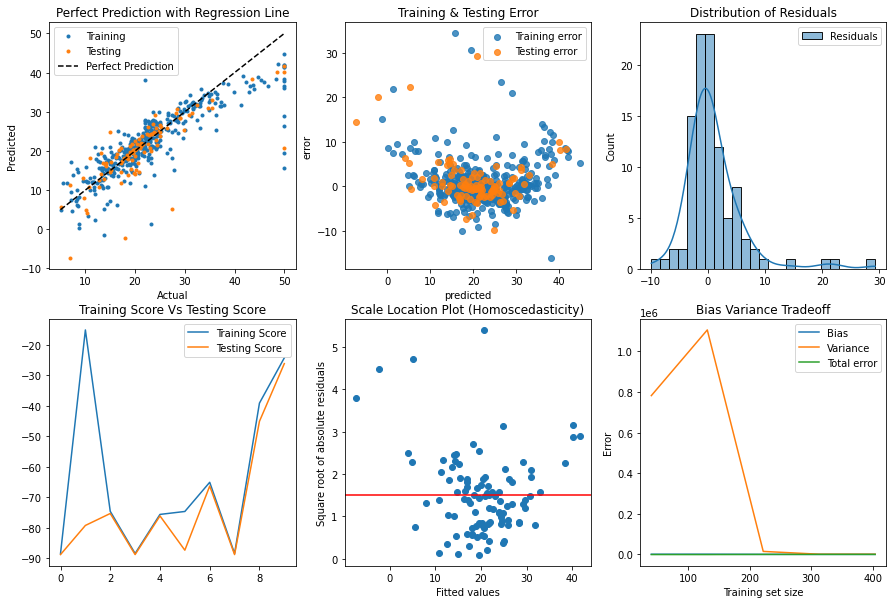

Wall time: 32min 55s


In [737]:
%%time
a, b, c = svm_regression_cv(df, 'Price')

In [738]:
a

,Actual,Predicted
477,12.0,9.026299
15,19.9,18.800334
332,19.4,23.209840
423,13.4,11.110134
19,18.2,17.512562
...,...,...
412,17.9,-2.240243
436,9.6,13.063611
411,17.2,14.720866
86,22.5,21.810227


In [739]:
b

,SVR (Train),SVR (Test)
MAE,3.136516,3.146504
MSE,24.569434,29.648102
RMSE,4.956756,5.445007
MAPE,15.204146,16.831048
Explained Variance,0.723241,0.612019
R2,0.717181,0.595710
Adjusted R2,0.716478,0.591667


In [740]:
c

SVR(C=10, degree=9, kernel='linear')

## Decision Tree Regressor (DT)

In [362]:
def dt_regression_cv(data, target_col, test_size=0.2, random_state=42):
    
    """
    Perform DT regression using RandomizedSearchCV.
    
    Parameters
    ----------
    data : pandas DataFrame
        The data to fit the model to.
    target_col : str
        The name of the target column in the data.
    test_size : float, optional
        The proportion of the data to use for testing, by default 0.2
    random_state : int, optional
        The random state to use for the RandomizedSearchCV object, by default 42
    
    Returns
    -------
    pandas DataFrame
        - A dataframe containing the train and test performance metrics and the 
        - A dataframe containing actual vs predicted values for the test data.
        - Dictionary with best parameters
    """
    
    # Store Performance Data
    performance_metrics = {}
    
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop(target_col, axis=1),  # features
        data[target_col],  # target
        test_size=test_size,
        random_state=random_state
    )
    
    # Set the parameters for random search
    param_distributions = {'max_depth': [3, 5, 7, 9, 11, 13, 15, 17, 19, None], 
                           'min_samples_split': [2, 3, 4, 5, 6, 12, 20], 
                           'min_samples_leaf': [1, 2, 3, 4, 5, 7, 10],
                           'max_features': ["auto", "sqrt", "log2", None],
                           'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]
                          }
    
    # create the SVM regressor object
    model = DecisionTreeRegressor()
    
    # create the RandomizedSearchCV object
    rs = RandomizedSearchCV(
        model,  # estimator
        param_distributions,  # parameter distribution
        n_iter=10, #nmber of iterations
        cv=5,  # number of folds
        scoring="neg_mean_squared_error",  # scoring metric
        random_state=random_state,
        verbose=True,
        return_train_score=True
    )
    
    # fit the RandomizedSearchCV object to the training data
    rs.fit(X_train, y_train)
    
    # get the best model from the RandomizedSearchCV object
    best_estimator = rs.best_estimator_
    print(best_estimator)
    
    ### Train Pred
    y_train_pred = rs.predict(X_train)
    
    ### Training Performance Metrics
    mae_train, mse_train, rmse_train, mape_train, evs_train, r2_train, r2_adj_train = evaluate_regression_performance(y_train, y_train_pred)
    
    
    ### Test Pred
    y_test_pred = rs.predict(X_test)

    ### Testing Performance Metrics
    mae_test, mse_test, rmse_test, mape_test, evs_test, r2_test, r2_adj_test = evaluate_regression_performance(y_test, y_test_pred)
    
    
    # Append
    performance_metrics['MAE'] = [mae_train, mae_test]
    performance_metrics['MSE'] = [mse_train, mse_test]
    performance_metrics['RMSE'] = [rmse_train, rmse_test]
    performance_metrics['MAPE'] = [mape_train, mape_test]
    performance_metrics['Explained Variance'] = [evs_train, evs_test]
    performance_metrics['R2'] = [r2_train, r2_test]
    performance_metrics['Adjusted R2'] = [r2_adj_train, r2_adj_test]
    
    ### Performance Metrics DF
    performance_metrics = pd.DataFrame(performance_metrics).T
    performance_metrics.columns = ['DT (Train)','DT (Test)']


    # Create a dataframe with the actual and predicted values for the training and test sets
    act_vs_pred = pd.DataFrame({"Actual": np.concatenate([y_train, y_test]),
                            "Predicted": np.concatenate([y_train_pred, y_test_pred])},
                           index=np.concatenate([X_train.index, X_test.index]))
    
    return act_vs_pred, performance_metrics, best_estimator

In [363]:
%%time
a, b, c = dt_regression_cv(df, 'Price')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
DecisionTreeRegressor(max_depth=11, min_samples_leaf=10, min_samples_split=20)
Wall time: 224 ms


In [364]:
a

,Actual,Predicted
477,12.0,13.170
15,19.9,21.960
332,19.4,20.075
423,13.4,13.170
19,18.2,18.900
...,...,...
412,17.9,13.170
436,9.6,16.360
411,17.2,13.170
86,22.5,22.750


In [365]:
b

,DT (Train),DT (Test)
MAE,2.219938,2.865501
MSE,11.830743,16.199420
RMSE,3.439585,4.024850
MAPE,10.595284,15.428206
Explained Variance,0.863816,0.781021
R2,0.863816,0.779100
Adjusted R2,0.863478,0.776891


In [366]:
c

DecisionTreeRegressor(max_depth=11, min_samples_leaf=10, min_samples_split=20)

## Random Forest Regressor

In [367]:
def rf_regression_cv(data, target_col, test_size=0.2, random_state=42):
    
    """
    Perform RF regression using RandomizedSearchCV.
    
    Parameters
    ----------
    data : pandas DataFrame
        The data to fit the model to.
    target_col : str
        The name of the target column in the data.
    test_size : float, optional
        The proportion of the data to use for testing, by default 0.2
    random_state : int, optional
        The random state to use for the RandomizedSearchCV object, by default 42
    
    Returns
    -------
    pandas DataFrame
        - A dataframe containing the train and test performance metrics and the 
        - A dataframe containing actual vs predicted values for the test data.
        - Dictionary with best parameters
    """
    
    # Store Performance Data
    performance_metrics = {}
    
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop(target_col, axis=1),  # features
        data[target_col],  # target
        test_size=test_size,
        random_state=random_state
    )
    
    param_distributions = {
        "n_estimators": [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)],
        "max_depth": [None, 5, 10, 15, 20, 25, 30],
        'min_samples_split': [2, 4, 6, 8, 10, 12, 15, 20, 25],
        'min_samples_leaf': [1, 2, 4, 6, 8, 12, 15, 18, 20],
        "max_features": [0.5, "auto", "sqrt", "log2"],
        "bootstrap": [True, False], 
        'min_weight_fraction_leaf': [0, 0.1, 0.2, 0.3, 0.4],
        'min_impurity_decrease': [0, 0.1, 0.2, 0.3, 0.4]
    }
    
    # create the SVM regressor object
    model = RandomForestRegressor()
    
    # create the RandomizedSearchCV object
    rs = RandomizedSearchCV(
        model,  # estimator
        param_distributions,  # parameter distribution
        n_iter=10, #nmber of iterations
        cv=5,  # number of folds
        scoring="neg_mean_squared_error",  # scoring metric
        random_state=random_state,
        verbose=True,
        return_train_score=True
    )
    
    # fit the RandomizedSearchCV object to the training data
    rs.fit(X_train, y_train)
    
    # get the best model from the RandomizedSearchCV object
    best_estimator = rs.best_estimator_
    print(best_estimator)
    
    ### Train Pred
    y_train_pred = rs.predict(X_train)
    
    ### Training Performance Metrics
    mae_train, mse_train, rmse_train, mape_train, evs_train, r2_train, r2_adj_train = evaluate_regression_performance(y_train, y_train_pred)
    
    
    ### Test Pred
    y_test_pred = rs.predict(X_test)

    ### Testing Performance Metrics
    mae_test, mse_test, rmse_test, mape_test, evs_test, r2_test, r2_adj_test = evaluate_regression_performance(y_test, y_test_pred)
    
    
    # Append
    performance_metrics['MAE'] = [mae_train, mae_test]
    performance_metrics['MSE'] = [mse_train, mse_test]
    performance_metrics['RMSE'] = [rmse_train, rmse_test]
    performance_metrics['MAPE'] = [mape_train, mape_test]
    performance_metrics['Explained Variance'] = [evs_train, evs_test]
    performance_metrics['R2'] = [r2_train, r2_test]
    performance_metrics['Adjusted R2'] = [r2_adj_train, r2_adj_test]
    
    ### Performance Metrics DF
    performance_metrics = pd.DataFrame(performance_metrics).T
    performance_metrics.columns = ['DT (Train)','DT (Test)']


    # Create a dataframe with the actual and predicted values for the training and test sets
    act_vs_pred = pd.DataFrame({"Actual": np.concatenate([y_train, y_test]),
                            "Predicted": np.concatenate([y_train_pred, y_test_pred])},
                           index=np.concatenate([X_train.index, X_test.index]))
    
    return act_vs_pred, performance_metrics, best_estimator

In [368]:
%%time
a, b, c = rf_regression_cv(df, 'Price')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
RandomForestRegressor(bootstrap=False, max_depth=5, min_impurity_decrease=0,
                      min_samples_leaf=2, min_samples_split=25,
                      min_weight_fraction_leaf=0, n_estimators=30)
Wall time: 41.1 s


In [369]:
a

,Actual,Predicted
477,12.0,13.170000
15,19.9,20.355556
332,19.4,20.355556
423,13.4,13.170000
19,18.2,20.355556
...,...,...
412,17.9,13.170000
436,9.6,14.771429
411,17.2,13.170000
86,22.5,20.355556


In [370]:
b

,DT (Train),DT (Test)
MAE,2.258354,2.434574
MSE,9.457088,9.779753
RMSE,3.075238,3.127260
MAPE,11.307687,13.819028
Explained Variance,0.891139,0.866698
R2,0.891139,0.866641
Adjusted R2,0.890869,0.865307


In [371]:
c

RandomForestRegressor(bootstrap=False, max_depth=5, min_impurity_decrease=0,
                      min_samples_leaf=2, min_samples_split=25,
                      min_weight_fraction_leaf=0, n_estimators=30)

## XGBOOST

In [429]:
def xgboost_regression_cv(data, target_col, test_size=0.2, random_state=42):
    
    """
    Perform XGBOOST regression using RandomizedSearchCV.
    
    Parameters
    ----------
    data : pandas DataFrame
        The data to fit the model to.
    target_col : str
        The name of the target column in the data.
    test_size : float, optional
        The proportion of the data to use for testing, by default 0.2
    random_state : int, optional
        The random state to use for the RandomizedSearchCV object, by default 42
    
    Returns
    -------
    pandas DataFrame
        - A dataframe containing the train and test performance metrics and the 
        - A dataframe containing actual vs predicted values for the test data.
        - Dictionary with best parameters
    """
    
    # Store Performance Data
    performance_metrics = {}
    
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        data.drop(target_col, axis=1),  # features
        data[target_col],  # target
        test_size=test_size,
        random_state=random_state
    )
    
#     param_distributions = {
#         "n_estimators": [50, 100, 200, 300, 400, 500],
#         "learning_rate": [0.01, 0.03, 0.05, 0.1],
#         "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
#         "min_child_weight": [1, 3, 5, 7, 9, 11],
#         "subsample": [0.5, 0.6, 0.7, 0.8, 0.9],
#         "colsample_bytree": [0.5, 0.6, 0.7, 0.8, 0.9],
#         "colsample_bylevel": [0.5, 0.6, 0.7, 0.8, 0.9],
#         "reg_alpha": [0, 0.5, 1],
#         "reg_lambda": [1, 1.5, 2],
#     }

#     param_distributions = {
#         "n_estimators": [50, 100, 200, 300, 400, 500],
#         'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
#         'max_depth': [3, 4, 5, 6, 7, 8, 9],
#         'min_child_weight': [1, 2, 3, 4, 5, 11],
#         'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
#         'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
#     }

    param_distributions = {
        "n_estimators": [50, 100, 200, 300, 400, 500],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.03, 0.05, 0.1],
        'subsample': [0.5, 0.75, 1],
        'colsample_bytree': [0.5, 0.75, 1],
        'colsample_bylevel': [0.5, 0.75, 1],
        'min_child_weight': [1, 3, 5],
        'gamma': [0, 0.25, 0.5, 0.75, 1],
        'reg_alpha': [0, 0.5, 1],
        'reg_lambda': [0, 0.5, 1],
        'n_estimators': [100, 200, 300, 400, 500]
    }

    # create the SVM regressor object
    model = XGBRegressor(n_jobs=-1)
    
    # create the RandomizedSearchCV object
    rs = RandomizedSearchCV(
        model,  # estimator
        param_distributions,  # parameter distribution
        n_iter=10, #nmber of iterations
        cv=5,  # number of folds
        scoring="neg_mean_squared_error",  # scoring metric
        random_state=random_state,
        verbose=True,
        return_train_score=True
    )
    
    # fit the RandomizedSearchCV object to the training data
    rs.fit(X_train, y_train)
    
    # get the best model from the RandomizedSearchCV object
    best_estimator = rs.best_estimator_
    print(best_estimator)

    ### Train Pred
    y_train_pred = rs.predict(X_train)
    
    ### Training Performance Metrics
    mae_train, mse_train, rmse_train, mape_train, evs_train, r2_train, r2_adj_train = evaluate_regression_performance(y_train, y_train_pred)
    
    
    ### Test Pred
    y_test_pred = rs.predict(X_test)

    ### Testing Performance Metrics
    mae_test, mse_test, rmse_test, mape_test, evs_test, r2_test, r2_adj_test = evaluate_regression_performance(y_test, y_test_pred)
    
    
    # Append
    performance_metrics['MAE'] = [mae_train, mae_test]
    performance_metrics['MSE'] = [mse_train, mse_test]
    performance_metrics['RMSE'] = [rmse_train, rmse_test]
    performance_metrics['MAPE'] = [mape_train, mape_test]
    performance_metrics['Explained Variance'] = [evs_train, evs_test]
    performance_metrics['R2'] = [r2_train, r2_test]
    performance_metrics['Adjusted R2'] = [r2_adj_train, r2_adj_test]
    
    ### Performance Metrics DF
    performance_metrics = pd.DataFrame(performance_metrics).T
    performance_metrics.columns = ['XGBOOST (Train)','XGBOOST (Test)']


    # Create a dataframe with the actual and predicted values for the training and test sets
    act_vs_pred = pd.DataFrame({"Actual": np.concatenate([y_train, y_test]),
                            "Predicted": np.concatenate([y_train_pred, y_test_pred])},
                           index=np.concatenate([X_train.index, X_test.index]))
    
#     # Plot the training and testing predictions
    plt.figure(figsize=(20, 10))
    plt.plot(y_train, y_train_pred, '.', label='Training')
    plt.plot(y_test, y_test_pred, '.', label='Testing')
    
    # Plot the perfect prediction line
    x_min = min(y_train.min(), y_test.min())
    x_max = max(y_train.max(), y_test.max())
    plt.plot([x_min, x_max], [x_min, x_max], '--k', label='Perfect Prediction')
    
    # Add the labels and legend
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.legend()

    return act_vs_pred, performance_metrics, best_estimator

Fitting 5 folds for each of 10 candidates, totalling 50 fits
XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=300,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1, reg_lambda=0.5, ...)
Wall time: 8.09 s


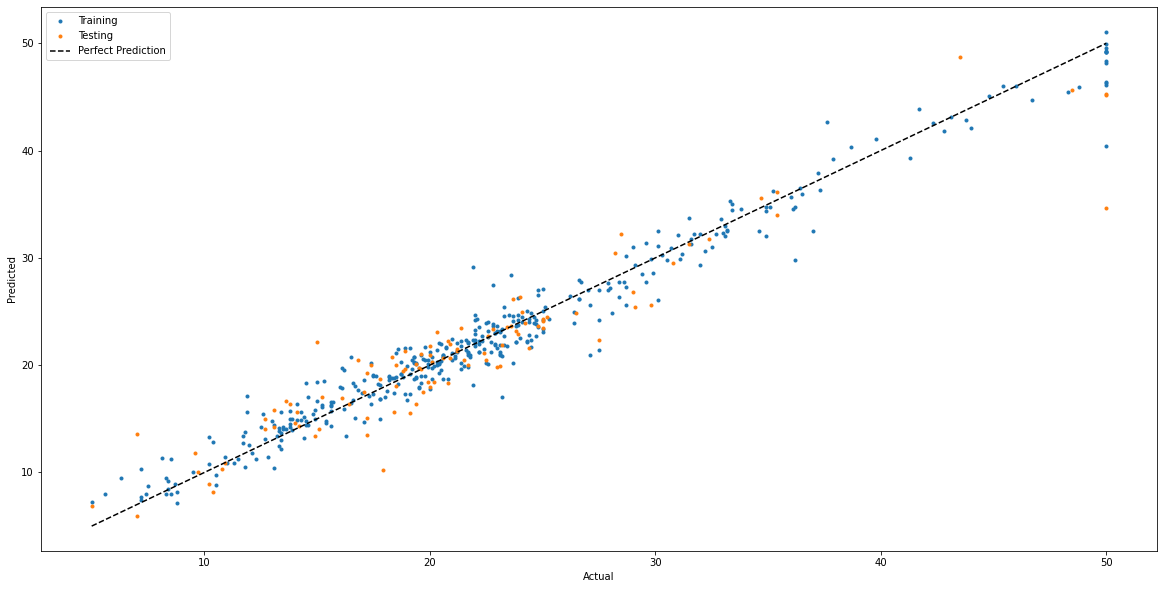

In [430]:
%%time
a, b, c = xgboost_regression_cv(df, 'Price')

In [431]:
a

,Actual,Predicted
477,12.0,12.582543
15,19.9,20.099775
332,19.4,20.216932
423,13.4,13.028467
19,18.2,18.888460
...,...,...
412,17.9,10.257341
436,9.6,11.804164
411,17.2,15.029100
86,22.5,20.471169


In [432]:
b

,XGBOOST (Train),XGBOOST (Test)
MAE,1.271142,1.950414
MSE,3.101121,7.933870
RMSE,1.761000,2.816713
MAPE,6.554612,10.212522
Explained Variance,0.964304,0.892726
R2,0.964303,0.891812
Adjusted R2,0.964214,0.890730


In [433]:
c

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.5, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.25, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.03, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=3,
             missing=nan, monotone_constraints='()', n_estimators=300,
             n_jobs=-1, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=1, reg_lambda=0.5, ...)